## Embeddings

Cada modelo tiene todos los vídeos y la etiqueta en la columna **shoot_zone**,  donde lanzamiento a la derecha es 0, al centro es 1 y a la izquierda  es 2. 

| Fichero                      | Modelo          | Comentarios sobre “\_SUFIJO”                              |
| ---------------------------- | --------------- | --------------------------------------------------------- |
| **baseline\_CASIAB.csv**     | Baseline        | Versión “base” (p.ej. GEINet simple) entrenada en CASIA-B |
| **baseline\_OUMVLP.csv**     | Baseline        | Igual que el anterior, pero pre-entrenado en OU-MVLP      |
| **gaitgl.csv**               | GaitGL          | GaitGL estándar (dataset por defecto, p.ej. CASIA-B)      |
| **gaitgl\_OUMVLP.csv**       | GaitGL          | Pre-entrenado en OU-MVLP                                  |
| **gaitgl\_GREW\.csv**        | GaitGL          | Pre-entrenado en GREW                                     |
| **gaitgl\_GREW\_BNNeck.csv** | GaitGL + BNNeck | Mismo que el anterior, con cuello de batch-norm extra     |
| **gaitpart.csv**             | GaitPart        | GaitPart estándar                                         |
| **gaitpart\_OUMVLP.csv**     | GaitPart        | Pre-entrenado en OU-MVLP                                  |
| **gaitpart\_GREW\.csv**      | GaitPart        | Pre-entrenado en GREW                                     |
| **gaitset.csv**              | GaitSet         | GaitSet estándar                                          |
| **gaitset\_OUMVLP.csv**      | GaitSet         | Pre-entrenado en OU-MVLP                                  |
| **gaitset\_GREW\.csv**       | GaitSet         | Pre-entrenado en GREW                                     |
| **gln\_phase1.csv**          | GLN (fase 1)    | Primer bloque/fase de extracción del modelo “GLN”         |
| **gln\_phase2.csv**          | GLN (fase 2)    | Fase de refinamiento o bloque final del mismo “GLN”       |


In [1]:
import os
import pandas as pd

# 1. Directorio con los CSV
data_dir = "Gait_Embeddings_good/"

# 2. Listar sólo los archivos .csv
csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]
print("Archivos encontrados:", csv_files)

# 3. Leer cada CSV en un DataFrame de pandas
dfs = {}
for fname in csv_files:
    path = os.path.join(data_dir, fname)
    dfs[fname] = pd.read_csv(path)

# 4. Explorar cada DataFrame
for name, df in dfs.items():
    print(f"\n=== {name} ===")
    print("Shape:", df.shape)                  # filas × columnas
    print("Columnas:", df.columns.tolist())    # lista de nombres
    print("Primeras 5 filas:")
    print(df.head().to_string(index=False))    # muestra las primeras filas

    # Opcional: ver tipo de datos y memoria
    print("\nInfo:")
    print(df.info())
    print("\nDescripción estadística de columnas numéricas:")
    print(df.describe().T)  # transpuesta para leer mejor


Archivos encontrados: ['baseline_CASIAB.csv', 'baseline_OUMVLP.csv', 'gaitgl.csv', 'gaitgl_GREW.csv', 'gaitgl_GREW_BNNeck.csv', 'gaitgl_OUMVLP.csv', 'gaitpart.csv', 'gaitpart_GREW.csv', 'gaitpart_OUMVLP.csv', 'gaitset.csv', 'gaitset_GREW.csv', 'gaitset_OUMVLP.csv', 'gln_phase1.csv', 'gln_phase2.csv']


C:\Users\grial_h2phao1\AppData\Local\Temp\ipykernel_7404\3135675460.py:15: DtypeWarning: Columns (129) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[fname] = pd.read_csv(path)



=== baseline_CASIAB.csv ===
Shape: (13392, 261)
Columnas: ['step', 'feat_0', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6', 'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12', 'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18', 'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24', 'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30', 'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36', 'feat_37', 'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42', 'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48', 'feat_49', 'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54', 'feat_55', 'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60', 'feat_61', 'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66', 'feat_67', 'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72', 'feat_73', 'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78', 'feat_79', 'feat_80', 'feat_81', 'feat_82', 'feat_83', 'feat_84', 'feat_8

## Metodología de desarrollo

1️⃣ datos → 2️⃣ preprocesado y normalización → 3️⃣ split → 4️⃣ Dataset/DataLoader (+ collate) → 5️⃣ modelo → 6️⃣ entrenamiento (función de pérdida y optimizador) → 7️⃣ evaluación → 8️⃣ ajuste → 9️⃣ guardado.

- Entender y explorar los datos

- Inspecciona las columnas, tipos de variables, balance de clases, valores faltantes y rangos.

- Visualiza distribuciones y posibles outliers.

- Limpieza y preprocesado

- Trata valores faltantes (imputación o eliminación).

- Normalización / escalado

- Aplica Min–Max o Z-score (standarización) para que todas las características queden en un rango controlado y evites que alguna domine el entrenamiento.

- En embeddings, a veces se usa L₂-norm para cada vector si quieres que tengan norma unidad.

- Dividir en train / validation / test

- Reserva al menos un 10–20 % para test “final”.

- Dentro del train crea validación (p. ej. 80/20 o K-fold) para ajustar hiperparámetros sin tocar el test.

- Definir Dataset y DataLoader para construir batches

- Definir el modelo

- Elegir función de pérdida y optimizador

- Bucle de entrenamiento

- Ajuste de hiperparámetros

- Guardado y almacenado de los pesos con torch.save(model.state_dict(), 'modelo.pt').







### Librerías 

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch.nn.utils.rnn import pack_padded_sequence, pad_sequence

In [2]:
# Configuración del dispositivo
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Dispositivo:", DEVICE)

Dispositivo: cuda


### Guardado de los Modelos

In [ ]:

def save_model(model, path: str):
    """
    Guarda en 'path' únicamente los pesos (state_dict) de `model`.
    """
    torch.save(model.state_dict(), path)
    print(f"Modelo guardado en {path}\n")


def load_model(model_class, path, device=DEVICE, **model_kwargs):
    """
    Carga un modelo de cualquier clase PyTorch definida por el usuario.
    
    Parámetros:
    - model_class: la clase del modelo (MLPClassifier, LSTMClassifier, TransformerClassifier, etc.)
    - path:        ruta al archivo .pth con state_dict()
    - device:      dispositivo donde cargar el modelo (ej. DEVICE)
    - **model_kwargs: argumentos para instanciar la clase de modelo 
                      (input_dim, hidden_dim, num_layers, ...)
    """
    # Instancia la arquitectura con los kwargs
    model = model_class(**model_kwargs).to(device)
    # Carga pesos entrenados
    state_dict = torch.load(path, map_location=device)
    model.load_state_dict(state_dict)
    model.eval()
    return model

-----------------------------------------------------------------------
## Modelo MLP

In [ ]:
#MLP sencillo con pooling previo
class MLPClassifier(nn.Module):
    def __init__(self, input_dim):
        """
        input_dim: dimensión D del embedding tras pooling
        """
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, 64),
            nn.ReLU(inplace=True),
            nn.Linear(64, 3)  # 3 clases: derecha, centro, izquierda
        )

    def forward(self, x):
        # x: (batch_size, D)
        return self.net(x)


## Preparación de datos, split y bucle de entrenamiento: MLP
Al preparar los datos para el MLP, primero agrupamos todas las filas del CSV que pertenecen a un mismo video_ID en una matriz de tamaño (T, D), donde T es el número de frames de ese vídeo y D las 256 características por frame. A continuación aplicamos mean‐pooling o max‐pooling sobre el eje temporal T, colapsando cada matriz a un único vector de dimensión (D,) que resume toda la aproximación del jugador al penalti. Ese conjunto de vectores —uno por vídeo— se divide de forma estratificada en train y test, de modo que en el entrenamiento el DataLoader extrae batches de tamaño fijo (por ejemplo 32) con esos vectores y sus etiquetas, y así el MLP aprende a clasificar la dirección del lanzamiento usando esos resúmenes globales.

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from torch.utils.data import TensorDataset, DataLoader



def prepare_mlp_data(df, pooling, norm, test_size=0.2):
    # 1) Pooling temporal
    feat_cols = [c for c in df.columns if c.startswith('feat_')]
    seqs, labs = [], []
    for vid, grp in df.groupby('video_ID'):
        arr = grp[feat_cols].values.astype(np.float32)  # (T, D)
        vec = arr.mean(axis=0) if pooling=='mean' else arr.max(axis=0)
        seqs.append(vec)
        labs.append(int(grp['shoot_zone'].iloc[0]))
    X = np.stack(seqs)  # (N, D)
    y = np.array(labs, dtype=np.int64)

    # 2) Normalización
    if norm == 'minmax':
        X = MinMaxScaler().fit_transform(X)
    elif norm == 'L2':  # 'l2'
        X = normalize(X, norm='l2')

    # 3) Split estratificado
    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)

    # 4) TensorDatasets
    tr_ds = TensorDataset(torch.from_numpy(Xtr).float(),
                          torch.from_numpy(ytr))
    te_ds = TensorDataset(torch.from_numpy(Xte).float(),
                          torch.from_numpy(yte))
    return tr_ds, te_ds

def run_training(model, train_loader, test_loader, epochs=20, lr=1e-3):
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4) # REVISAR
    loss_fn   = nn.CrossEntropyLoss()
    history   = {'train_loss':[], 'test_acc':[], 'test_f1':[]}

    for ep in range(1, epochs+1):
        # entrenamiento
        model.train()
        total_loss = 0
        for xb, yb in train_loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            optimizer.zero_grad()
            out = model(xb)
            loss = loss_fn(out, yb)
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * yb.size(0)
        history['train_loss'].append(total_loss / len(train_loader.dataset))

        # evaluación
        model.eval()
        all_preds, all_labels = [], []
        with torch.no_grad():
            for xb, yb in test_loader:
                xb = xb.to(DEVICE)
                preds = model(xb).argmax(dim=1).cpu().numpy()
                all_preds.append(preds)
                all_labels.append(yb.numpy())
        all_preds  = np.concatenate(all_preds)
        all_labels = np.concatenate(all_labels)
        acc = accuracy_score(all_labels, all_preds)
        f1  = f1_score(all_labels, all_preds, average='macro')
        history['test_acc'].append(acc)
        history['test_f1'].append(f1)

        print(f"Ep{ep:02d} | loss {history['train_loss'][-1]:.4f} "
              f"| acc {acc:.4f} | f1_macro {f1:.4f}")

    return history


## Entrenamiento

In [ ]:
import os
import pandas as pd
from torch.utils.data import DataLoader

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DATA_DIR = "Gait_Embeddings_good"
POOLS    = ['mean', 'max']
NORMS    = ['minmax', 'L2']
EPOCHS   = 1000
BATCH    = 64
LOAD_MODEL = False  # Si True, carga un modelo preentrenado en lugar de entrenar uno nuevo

PATH = "saved_models/MLP/"
os.makedirs(PATH, exist_ok=True)

results = []

for fname in os.listdir(DATA_DIR):
    if not fname.endswith('.csv'):
        continue
    print(f"\n--- Entrenando MLP con {fname} ---")
    df = pd.read_csv(os.path.join(DATA_DIR, fname))

    for pool in POOLS:
        for norm in NORMS:
            tr_ds, te_ds = prepare_mlp_data(df, pooling=pool, norm=norm, test_size=0.2)
            tr_loader = DataLoader(tr_ds, batch_size=BATCH, shuffle=True)
            te_loader = DataLoader(te_ds, batch_size=BATCH)

            model = MLPClassifier(tr_ds[0][0].shape[0]).to(DEVICE) 
            
            # Si LOAD_MODEL es True, intenta cargar un modelo preentrenado
            if LOAD_MODEL == True:
                model_path = os.path.join(PATH, f"mlp_{pool}_{norm}_{fname.replace('.csv', '')}.pth")
                if os.path.exists(model_path):
                    print(f"Cargando modelo preentrenado desde {model_path}")
                    model = load_model(MLPClassifier, model_path, input_dim=tr_ds[0][0].shape[0])
            
            history = run_training(model, tr_loader, te_loader, epochs=EPOCHS, lr=1e-3)

            results.append({
                'extractor':     fname,
                'model':         'MLP',
                'epochs':        EPOCHS,
                'batch_size':    BATCH,
                'pooling':       pool,
                'normalization': norm,
                'accuracy':      round(history['test_acc'][-1], 5),
                'f1_macro':      round(history['test_f1'][-1], 5)
            })
            
            # Guardar modelo
            model_path = os.path.join(PATH, f"mlp_{pool}_{norm}_{fname.replace('.csv', '')}.pth")
            save_model(model, model_path)


# Guardar resultados finales
df_res = pd.DataFrame(results)
df_res.to_csv(f"results/mlp_penalty_results_{BATCH}.csv", index=False)
print("\n✅ Resultados guardados en mlp_penalty_results.csv")


## Matriz de Confusión y Curva ROC

In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def evaluate_confusion_matrix(model, dataloader, device, class_names):
    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for batch in dataloader:
            # Adaptar según tu DataLoader (2 ó 3 elementos)
            if len(batch) == 3:
                xb, lengths, yb = batch
                xb, lengths = xb.to(device), lengths.to(device)
                logits = model(xb, lengths)
            else:
                xb, yb = batch
                xb = xb.to(device)
                logits = model(xb)

            preds = logits.argmax(dim=1).cpu().numpy()
            y_pred.extend(preds)
            y_true.extend(yb.numpy())

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    cm = confusion_matrix(y_true, y_pred)

    # Dibujar
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Matriz de Confusión")
    plt.colorbar()
    ticks = np.arange(len(class_names))
    plt.xticks(ticks, class_names, rotation=45)
    plt.yticks(ticks, class_names)
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.ylabel("Etiqueta real")
    plt.xlabel("Etiqueta predicha")
    plt.tight_layout()
    plt.show()
    return cm



def evaluate_multiclass_roc(model, dataloader, device, class_names):
    model.eval()
    y_true, y_score = [], []

    with torch.no_grad():
        for batch in dataloader:
            if len(batch) == 3:
                xb, lengths, yb = batch
                xb, lengths = xb.to(device), lengths.to(device)
                logits = model(xb, lengths)
            else:
                xb, yb = batch
                xb = xb.to(device)
                logits = model(xb)

            probs = F.softmax(logits, dim=1).cpu().numpy()
            y_score.append(probs)
            y_true.append(yb.numpy())

    y_true = np.concatenate(y_true)
    y_score = np.concatenate(y_score)
    n_classes = y_score.shape[1]
    y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))

    plt.figure(figsize=(6,5))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC={roc_auc:.2f})")

    plt.plot([0,1], [0,1], 'k--', label="Azar")
    plt.xlabel("Tasa Falsos Positivos")
    plt.ylabel("Tasa Verdaderos Positivos")
    plt.title("ROC Multi-clase (One-vs-Rest)")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()


In [ ]:
# Asumiendo que ya tienes un modelo entrenado y un DataLoader de test
class_names = ['derecha', 'centro', 'izquierda']
evaluate_multiclass_roc(model, te_loader, DEVICE, class_names)
cm = evaluate_confusion_matrix(model, te_loader, DEVICE, class_names)

# Numero de aciertos y errores
print("\n=== Resultados de la matriz de confusión para test ===")
print("Aciertos (diagonal):", np.diag(cm).sum())
print("Errores (fuera de la diagonal):", cm.sum() - np.diag(cm).sum())


-------------------------------------------------------------------------------
## Modelo LSTM y BiLSTM

In [4]:

#LSTM (o BiLSTM) con salida densa
class LSTMClassifier(nn.Module):
    def __init__(
        self,
        input_dim,
        hidden_dim,
        num_layers,
        bidirectional,
        dropout):

        """
        input_dim: dimensión D del embedding sin pooling (secuencia)
        hidden_dim: tamaño de la capa oculta LSTM
        num_layers: número de capas LSTM
        bidirectional: si usar BiLSTM
        dropout: dropout entre capas LSTM (si num_layers > 1)
        """
        
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim, 
            num_layers=num_layers,
            batch_first=True,
            bidirectional=bidirectional,
            dropout=dropout if num_layers > 1 else 0.0
        )
        final_dim = hidden_dim * (2 if bidirectional else 1)
        self.fc = nn.Linear(final_dim, 3)

    def forward(self, x, lengths):
        """
        x: tensor FloatTensor de forma (B, T, D)
        lengths: LongTensor con longitudes reales de cada secuencia (B,)
        """
        # Empaquetar secuencias variables
        packed = pack_padded_sequence(x, lengths.cpu(), batch_first=True, enforce_sorted=False)
        packed_out, (h_n, _) = self.lstm(packed)
        # h_n tiene forma (num_layers * num_directions, B, hidden_dim)
        # Extraemos la última capa de la última dirección
        if self.lstm.bidirectional:
            # Dos direcciones: concatenar capa final forward y backward
            h_forward = h_n[-2]  # última capa forward
            h_backward = h_n[-1]  # última capa backward
            h_final = torch.cat([h_forward, h_backward], dim=1)
        else:
            # Solo una dirección
            h_final = h_n[-1]
        return self.fc(h_final)


In [3]:
class LSTMClassifier(nn.Module):
    def __init__(
        self,
        input_dim,      # 256 features del CSV
        hidden_dim,     # Dimensión oculta de la LSTM 
        num_layers,     # Número de capas LSTM 
        bidirectional,  # Si usar BiLSTM
        dropout        # Dropout entre capas y antes de clasificación
    ):
        super().__init__()

        # 1. Capas LSTM apiladas con dropout entre ellas
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=bidirectional,
            dropout=dropout if num_layers > 1 else 0.0  # Dropout solo si hay múltiples capas
        )
        
        # 2. Dimensiones de salida
        self.lstm_out_dim = hidden_dim * (2 if bidirectional else 1)  # Dimensión de salida LSTM
        self.hidden_dim = self.lstm_out_dim // 2 if bidirectional else self.lstm_out_dim

        # 3. Capa densa final
        self.fc = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(self.lstm_out_dim, self.hidden_dim),
            nn.ReLU(),
            nn.Linear(self.hidden_dim, 3)  # 3 clases: derecha, centro, izquierda
        )

    def forward(self, x, lengths):
        # 1. Empaquetar secuencias variables
        packed = pack_padded_sequence(x, lengths.cpu(), 
                                    batch_first=True, 
                                    enforce_sorted=False)

        # 2. Procesar con LSTM
        # Shape de h_n: (num_layers * 2, batch_size, hidden_dim) el caso de BiLSTM
        # el num_layers * 2 es porque hay una capa forward y otra backward de ahí el 2
        _, (h_n, _) = self.lstm(packed)
        
        # 3. Obtener estado final (último estado de la última capa)
        if self.lstm.bidirectional:
            h_forward = h_n[-2]  # última capa forward
            h_backward = h_n[-1]  # última capa backward
            h_final = torch.cat([h_forward, h_backward], dim=1)
        else:
            h_final = h_n[-1]

        # 4. Pasar por la capa densa final
        return self.fc(h_final)


## Preparación de datos, split y bucle de entrenamiento: LSTM

In [4]:
import numpy as np
import torch
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.model_selection import train_test_split
from torch.nn.utils.rnn import pad_sequence

def collate_sequences(batch):
    """
    Recibe una lista de (tensor_seq, label).
    Devuelve:
      - padded: tensor (B, T_max, D)
      - lengths: tensor (B,)
      - labels: tensor (B,)
    """
    seqs, labels = zip(*batch)
    lengths = torch.tensor([s.size(0) for s in seqs], dtype=torch.long)
    padded = pad_sequence(seqs, batch_first=True)
    labels = torch.tensor(labels, dtype=torch.long)
    return padded, lengths, labels

def prepare_seq_data(df, norm, test_size):#REVISAR
    """
    df: DataFrame con columnas feat_0…feat_D-1, video_ID y shoot_zone
    norm: 'minmax' o 'l2'
    Devuelve dos listas de muestras (tensor_seq, label) para train y test.
    """
    # 1) Extraer todas las secuencias y etiquetas
    feat_cols = [c for c in df.columns if c.startswith('feat_')]
    seqs, labs = [], []
    for vid, grp in df.groupby('video_ID'):
        arr = grp[feat_cols].values.astype(np.float32)  # (T, D)
        seqs.append(arr)
        labs.append(int(grp['shoot_zone'].iloc[0]))

    # 2) Normalizar
    if norm == 'minmax':
        all_frames = np.vstack(seqs)
        scaler = MinMaxScaler().fit(all_frames)
        seqs = [scaler.transform(s) for s in seqs]
    elif norm == 'L2':  # L2-norm por frame
        seqs = [normalize(s, norm='l2', axis=1) for s in seqs]

    # 3) Split estratificado
    idx = list(range(len(seqs)))
    idx_tr, idx_te = train_test_split(
        idx, test_size=test_size, stratify=labs, random_state=42)

    # 4) Convertir a listas de tuplas (tensor_seq, label)
    train_list = [(torch.from_numpy(seqs[i]), labs[i]) for i in idx_tr]
    test_list  = [(torch.from_numpy(seqs[i]), labs[i]) for i in idx_te]


    return train_list, test_list


def run_training_lstm(model, train_loader, test_loader, epochs, lr):
    """
    Función de entrenamiento específica para el modelo LSTM
    Args:
        model: Instancia de LSTMClassifier
        train_loader: DataLoader con datos de entrenamiento (incluye lengths)
        test_loader: DataLoader con datos de test (incluye lengths)
        epochs: Número de épocas de entrenamiento
        lr: Learning rate para el optimizador
    Returns:
        history: Diccionario con métricas de entrenamiento
    """
    device = next(model.parameters()).device
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()
    history = {'train_loss': [],'test_loss':[], 'test_acc': [], 'test_f1': []}

    patience = 100  # Paciencia para early stopping
    min_delta = 0.0005  # Mínima mejora para considerar que hay progreso
    best_loss = float('inf')  # Mejor pérdida inicial
    epochs_no_improve = 0  # Contador de épocas sin mejora

    for ep in range(1, epochs + 1):
        # --- TRAIN ---
        model.train()
        total_loss = 0
        for xb, lengths, yb in train_loader:
            # Mover datos a GPU/CPU
            xb = xb.to(device)
            lengths = lengths.to(device)
            yb = yb.to(device)
            
            # Forward pass
            optimizer.zero_grad()
            out = model(xb, lengths)
            loss = loss_fn(out, yb)
            
            # Backward pass
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item() * yb.size(0)
        
        avg_loss = total_loss / len(train_loader.dataset)
        history['train_loss'].append(avg_loss)

        # --- TEST ---
        model.eval()
        all_preds, all_labels = [], []
        #test_sum = 0
        
        with torch.no_grad():
            for xb, lengths, yb in test_loader:
                xb = xb.to(device)
                lengths = lengths.to(device)
                
                # Predicción
                outputs = model(xb, lengths)
                preds = outputs.argmax(dim=1).cpu().numpy()
                
                #test_sum += loss_fn(outputs, yb).item() * yb.size(0)
                
                all_preds.append(preds)
                all_labels.append(yb.numpy())

        # Calcular métricas
        #avg_test_loss = test_sum / len(test_loader.dataset)
        #history['test_loss'].append(avg_test_loss)

        all_preds = np.concatenate(all_preds)
        all_labels = np.concatenate(all_labels)
        
        acc = accuracy_score(all_labels, all_preds)
        f1 = f1_score(all_labels, all_preds, average='macro')
        
        history['test_acc'].append(acc)
        history['test_f1'].append(f1)

        # Imprimir progreso
        print(f"Época {ep:02d}/{epochs} | "
              f"train_loss {avg_loss:.4f} | "
              f"accuracy {acc:.4f} | "
              f"f1_macro {f1:.4f}")
        

        # — Early stopping basado en test_loss —
        if ep > 300:
            if avg_loss < best_loss - min_delta:
                best_loss = avg_loss
                epochs_no_improve = 0
            else:
                epochs_no_improve += 1
                if epochs_no_improve >= patience:
                    print(f"\nEarly stopping tras {epochs_no_improve} épocas "
                          f"sin mejorar el train_loss (delta<{min_delta}).")
                    break

    return history




## Optimización de hiperparámetros

In [5]:
import os
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, normalize
import torch
from torch.utils.data import DataLoader

# Configuración global
DATA_DIR = "Gait_Embeddings_good"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BASE_EMBEDDINGS = { # Uno por cada embedding base
    'baseline': 'baseline_OUMVLP.csv',
    'gaitgl': 'gaitgl.csv',
    'gaitpart': 'gaitpart.csv',
    'gaitset': 'gaitset.csv',
    'gln': 'gln_phase1.csv'
}

def objective(trial, df):
    """Función objetivo para Optuna"""
    config = {
        'hidden_dim': trial.suggest_categorical("hidden_dim", [64, 128, 256]),
        'num_layers': trial.suggest_int("num_layers", 1, 3),
        'bidirectional': trial.suggest_categorical("bidirectional", [False, True]),
        'dropout': trial.suggest_categorical("dropout", [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]),
        'lr': trial.suggest_categorical("lr", [1e-5, 1e-4, 1e-3]),
        'batch_size': trial.suggest_categorical("batch_size", [32, 64, 128]),
        'norm': trial.suggest_categorical("norm", ["minmax", "L2"])
    }

    print(f"\n{'='*50}")
    print(f"Trial {trial.number}")
    print(f"Configuración: {config}")
    print(f"{'='*50}\n")

    # Preparar datos para K-Fold
    video_ids = list(df.groupby('video_ID').groups.keys())
    labels = [int(df[df['video_ID']==vid]['shoot_zone'].iloc[0]) for vid in video_ids]

    # K-Fold Cross Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    fold_scores = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(video_ids, labels)):
        print(f"\nFold {fold+1}/5")
        
        # Separar datos de train/val
        train_ids = [video_ids[i] for i in train_idx]
        val_ids = [video_ids[i] for i in val_idx]
        
        df_train = df[df['video_ID'].isin(train_ids)]
        df_val = df[df['video_ID'].isin(val_ids)]
        
        # Preparar datos
        feat_cols = [c for c in df_train.columns if c.startswith('feat_')]
        
        # Train data
        train_seqs = []
        train_labs = []
        for vid, grp in df_train.groupby('video_ID'):
            arr = grp[feat_cols].values.astype(np.float32)
            if config['norm'] == 'minmax':
                arr = MinMaxScaler().fit_transform(arr)
            else:  # L2
                arr = normalize(arr, norm='l2', axis=1)
            train_seqs.append(torch.from_numpy(arr))
            train_labs.append(int(grp['shoot_zone'].iloc[0]))
        
        # Val data
        val_seqs = []
        val_labs = []
        for vid, grp in df_val.groupby('video_ID'):
            arr = grp[feat_cols].values.astype(np.float32)
            if config['norm'] == 'minmax':
                arr = MinMaxScaler().fit_transform(arr)
            else:  # L2
                arr = normalize(arr, norm='l2', axis=1)
            val_seqs.append(torch.from_numpy(arr))
            val_labs.append(int(grp['shoot_zone'].iloc[0]))

        # Crear datasets y dataloaders
        train_data = list(zip(train_seqs, train_labs))
        val_data = list(zip(val_seqs, val_labs))
        
        train_loader = DataLoader(train_data, batch_size=config['batch_size'], shuffle=True, collate_fn=collate_sequences)
        val_loader = DataLoader(val_data, batch_size=config['batch_size'], shuffle=False, collate_fn=collate_sequences)

        # Crear y entrenar modelo
        model = LSTMClassifier(
            input_dim=df.filter(like='feat_').shape[1],
            hidden_dim=config['hidden_dim'],
            num_layers=config['num_layers'],
            bidirectional=config['bidirectional'],
            dropout=config['dropout']
        ).to(DEVICE)

        # Entrenar
        history = run_training_lstm(
            model=model,
            train_loader=train_loader, 
            test_loader=val_loader,
            epochs=150,  
            lr=config['lr']
        )
        
        # Guardar mejor F1 score del fold
        fold_scores.append(max(history['test_f1']))

    mean_f1 = np.mean(fold_scores)
    print(f"\nConfiguración: {config}")
    print(f"F1-score medio: {mean_f1:.4f}")
    
    return mean_f1

def optimize_embeddings():
    """Ejecuta optimización para cada embedding base"""
    
    os.makedirs("results", exist_ok=True)
    results = {}
    
    for name, fname in BASE_EMBEDDINGS.items():
        print(f"\n{'='*50}")
        print(f"Optimizando {name}")
        print(f"{'='*50}")
        
        # Cargar datos
        df = pd.read_csv(os.path.join(DATA_DIR, fname))
        
        # Crear y ejecutar estudio
        study = optuna.create_study(direction="maximize")
        study.optimize(
            lambda trial: objective(trial, df),
            n_trials=20,  # 20 trials por embedding
            n_jobs=4,     # Paralelización
            timeout=3600  # Timeout de 1 hora por embedding
        )
        
        # Guardar resultados
        results[name] = {
            'best_params': study.best_params,
            'best_f1': study.best_value
        }
        
        # Guardar trials en CSV
        study_df = study.trials_dataframe()
        study_df.to_csv(f"results/hyperparams_{name}.csv", index=False)
        
        print(f"\nMejores parámetros para {name}:")
        print(f"F1-score: {study.best_value:.4f}")
        print("Configuración:", study.best_params)
        
    # Guardar resumen final
    final_results = []
    for embedding, res in results.items():
        row = {
            'embedding': embedding,
            'best_f1': res['best_f1'],
            **res['best_params']
        }
        final_results.append(row)
    
    df_final = pd.DataFrame(final_results)
    df_final.to_csv("results/best_params_LSTM.csv", index=False)
    print("\nResumen final guardado en results/best_params_LSTM.csv")
    
    return results

c:\Users\grial_h2phao1\anaconda3\envs\TFG\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# Optuna
results = optimize_embeddings()


Optimizando baseline


[I 2025-06-11 02:04:37,065] A new study created in memory with name: no-name-1c79f204-565e-4dec-be15-723da5bf89d6



Trial 0
Configuración: {'hidden_dim': 256, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.0, 'lr': 0.001, 'batch_size': 64, 'norm': 'L2'}


Trial 2
Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.5, 'lr': 1e-05, 'batch_size': 64, 'norm': 'L2'}


Trial 1
Configuración: {'hidden_dim': 256, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.5, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}


Trial 3
Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.3, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}


Fold 1/5

Fold 1/5

Fold 1/5

Fold 1/5
Época 01/150 | train_loss 1.0771 | accuracy 0.4828 | f1_macro 0.2171
Época 01/150 | train_loss 1.0325 | accuracy 0.4828 | f1_macro 0.2171
Época 01/150 | train_loss 1.0502 | accuracy 0.4828 | f1_macro 0.2171
Época 01/150 | train_loss 1.0467 | accuracy 0.4828 | f1_macro 0.2171
Época 02/150 | train_loss 1.0766 | accuracy 0.4828 | f1_macro 0.2171
Época 02/150 | train_l

[I 2025-06-11 02:06:50,061] Trial 2 finished with value: 0.24466238095938744 and parameters: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.5, 'lr': 1e-05, 'batch_size': 64, 'norm': 'L2'}. Best is trial 2 with value: 0.24466238095938744.


Época 149/150 | train_loss 1.0498 | accuracy 0.4767 | f1_macro 0.2152
Época 28/150 | train_loss 1.0096 | accuracy 0.4767 | f1_macro 0.2152
Época 117/150 | train_loss 0.4980 | accuracy 0.5116 | f1_macro 0.3717
Época 12/150 | train_loss 1.0108 | accuracy 0.4767 | f1_macro 0.2152
Época 150/150 | train_loss 1.0492 | accuracy 0.4767 | f1_macro 0.2152

Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.5, 'lr': 1e-05, 'batch_size': 64, 'norm': 'L2'}
F1-score medio: 0.2447

Trial 4
Configuración: {'hidden_dim': 256, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.0, 'lr': 0.001, 'batch_size': 32, 'norm': 'minmax'}

Época 29/150 | train_loss 1.0063 | accuracy 0.4767 | f1_macro 0.2152
Época 118/150 | train_loss 0.4362 | accuracy 0.5000 | f1_macro 0.3699
Época 13/150 | train_loss 0.9965 | accuracy 0.4767 | f1_macro 0.2152

Fold 1/5
Época 119/150 | train_loss 0.5045 | accuracy 0.5349 | f1_macro 0.3798
Época 30/150 | train_loss 1.0105 | accuracy 0.4767 | 

[I 2025-06-11 02:06:57,263] Trial 3 finished with value: 0.4712892299427421 and parameters: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.3, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}. Best is trial 3 with value: 0.4712892299427421.


Época 58/150 | train_loss 1.0019 | accuracy 0.4767 | f1_macro 0.2152
Época 41/150 | train_loss 0.8019 | accuracy 0.4884 | f1_macro 0.3084
Época 150/150 | train_loss 0.4430 | accuracy 0.5233 | f1_macro 0.3785

Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.3, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}
F1-score medio: 0.4713

Trial 5
Configuración: {'hidden_dim': 64, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.3, 'lr': 0.0001, 'batch_size': 128, 'norm': 'minmax'}

Época 16/150 | train_loss 1.0091 | accuracy 0.4828 | f1_macro 0.2171
Época 59/150 | train_loss 1.0007 | accuracy 0.4767 | f1_macro 0.2152
Época 42/150 | train_loss 0.8619 | accuracy 0.4535 | f1_macro 0.3666

Fold 1/5
Época 17/150 | train_loss 1.0087 | accuracy 0.4828 | f1_macro 0.2171
Época 60/150 | train_loss 1.0002 | accuracy 0.4767 | f1_macro 0.2152
Época 43/150 | train_loss 0.7904 | accuracy 0.5116 | f1_macro 0.3612
Época 61/150 | train_loss 1.0003 | accuracy 0.4767 

[I 2025-06-11 02:07:18,836] Trial 1 finished with value: 0.4458959181459231 and parameters: {'hidden_dim': 256, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.5, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}. Best is trial 3 with value: 0.4712892299427421.


Época 33/150 | train_loss 1.0003 | accuracy 0.4828 | f1_macro 0.2171
Época 150/150 | train_loss 0.7959 | accuracy 0.5930 | f1_macro 0.4666

Configuración: {'hidden_dim': 256, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.5, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}
F1-score medio: 0.4459

Trial 6
Configuración: {'hidden_dim': 256, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.3, 'lr': 1e-05, 'batch_size': 128, 'norm': 'L2'}

Época 131/150 | train_loss 0.0023 | accuracy 0.5698 | f1_macro 0.4737
Época 34/150 | train_loss 1.0094 | accuracy 0.4828 | f1_macro 0.2171
Época 77/150 | train_loss 0.8721 | accuracy 0.6092 | f1_macro 0.4348
Época 35/150 | train_loss 1.0085 | accuracy 0.4828 | f1_macro 0.2171
Época 132/150 | train_loss 0.0023 | accuracy 0.5698 | f1_macro 0.4737

Fold 1/5
Época 36/150 | train_loss 1.0066 | accuracy 0.4828 | f1_macro 0.2171
Época 37/150 | train_loss 1.0069 | accuracy 0.4828 | f1_macro 0.2171
Época 133/150 | train_loss 0.0015 | accuracy 0.5581 | f

[I 2025-06-11 02:07:25,342] Trial 0 finished with value: 0.4864563398074166 and parameters: {'hidden_dim': 256, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.0, 'lr': 0.001, 'batch_size': 64, 'norm': 'L2'}. Best is trial 0 with value: 0.4864563398074166.


Época 29/150 | train_loss 1.0820 | accuracy 0.4828 | f1_macro 0.2171

Trial 7
Configuración: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.5, 'lr': 0.0001, 'batch_size': 128, 'norm': 'L2'}

Época 77/150 | train_loss 1.0098 | accuracy 0.4828 | f1_macro 0.2171
Época 90/150 | train_loss 0.8265 | accuracy 0.5862 | f1_macro 0.4215
Época 30/150 | train_loss 1.0811 | accuracy 0.4828 | f1_macro 0.2171
Época 78/150 | train_loss 1.0015 | accuracy 0.4828 | f1_macro 0.2171
Época 31/150 | train_loss 1.0803 | accuracy 0.4828 | f1_macro 0.2171
Época 79/150 | train_loss 1.0040 | accuracy 0.4828 | f1_macro 0.2171

Fold 1/5
Época 80/150 | train_loss 0.9993 | accuracy 0.4828 | f1_macro 0.2171
Época 32/150 | train_loss 1.0791 | accuracy 0.4828 | f1_macro 0.2171
Época 91/150 | train_loss 0.8459 | accuracy 0.6092 | f1_macro 0.4301
Época 81/150 | train_loss 1.0021 | accuracy 0.4828 | f1_macro 0.2171
Época 33/150 | train_loss 1.0785 | accuracy 0.4828 | f1_macro 0.2171
Época 82/150 

[I 2025-06-11 02:08:36,911] Trial 5 finished with value: 0.3670082186921782 and parameters: {'hidden_dim': 64, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.3, 'lr': 0.0001, 'batch_size': 128, 'norm': 'minmax'}. Best is trial 0 with value: 0.4864563398074166.


Época 06/150 | train_loss 1.0894 | accuracy 0.4884 | f1_macro 0.2188
Época 150/150 | train_loss 0.9145 | accuracy 0.5581 | f1_macro 0.3911

Configuración: {'hidden_dim': 64, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.3, 'lr': 0.0001, 'batch_size': 128, 'norm': 'minmax'}
F1-score medio: 0.3670
Época 104/150 | train_loss 0.6892 | accuracy 0.4598 | f1_macro 0.3512

Trial 8
Configuración: {'hidden_dim': 256, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.3, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}

Época 01/150 | train_loss 1.1175 | accuracy 0.3605 | f1_macro 0.1766
Época 07/150 | train_loss 1.0889 | accuracy 0.4884 | f1_macro 0.2188
Época 02/150 | train_loss 1.1148 | accuracy 0.3605 | f1_macro 0.1766
Época 08/150 | train_loss 1.0876 | accuracy 0.4884 | f1_macro 0.2188
Época 03/150 | train_loss 1.1114 | accuracy 0.3605 | f1_macro 0.1766

Fold 1/5
Época 105/150 | train_loss 0.6732 | accuracy 0.4368 | f1_macro 0.3254
Época 04/150 | train_loss 1.1089 | accuracy 0.3605

[I 2025-06-11 02:09:32,171] Trial 7 finished with value: 0.21736632484892876 and parameters: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.5, 'lr': 0.0001, 'batch_size': 128, 'norm': 'L2'}. Best is trial 0 with value: 0.4864563398074166.



Trial 9
Configuración: {'hidden_dim': 64, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 64, 'norm': 'L2'}

Época 148/150 | train_loss 1.0075 | accuracy 0.4767 | f1_macro 0.2152
Época 06/150 | train_loss 1.0128 | accuracy 0.4828 | f1_macro 0.2171
Época 60/150 | train_loss 1.0065 | accuracy 0.4884 | f1_macro 0.2188
Época 149/150 | train_loss 1.0047 | accuracy 0.4767 | f1_macro 0.2152

Fold 1/5
Época 150/150 | train_loss 1.0053 | accuracy 0.4767 | f1_macro 0.2152

Configuración: {'hidden_dim': 256, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.3, 'lr': 1e-05, 'batch_size': 128, 'norm': 'L2'}
F1-score medio: 0.2174
Época 07/150 | train_loss 1.0057 | accuracy 0.4828 | f1_macro 0.2171


[I 2025-06-11 02:09:32,979] Trial 6 finished with value: 0.21736632484892876 and parameters: {'hidden_dim': 256, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.3, 'lr': 1e-05, 'batch_size': 128, 'norm': 'L2'}. Best is trial 0 with value: 0.4864563398074166.



Trial 10
Configuración: {'hidden_dim': 64, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.3, 'lr': 0.001, 'batch_size': 128, 'norm': 'L2'}

Época 61/150 | train_loss 0.9915 | accuracy 0.4884 | f1_macro 0.2188
Época 08/150 | train_loss 1.0084 | accuracy 0.4828 | f1_macro 0.2171

Fold 1/5
Época 09/150 | train_loss 1.0076 | accuracy 0.4828 | f1_macro 0.2171
Época 62/150 | train_loss 0.9798 | accuracy 0.4884 | f1_macro 0.2371
Época 01/150 | train_loss 1.1163 | accuracy 0.4943 | f1_macro 0.2639
Época 10/150 | train_loss 1.0076 | accuracy 0.4828 | f1_macro 0.2171
Época 63/150 | train_loss 0.9765 | accuracy 0.5000 | f1_macro 0.2413
Época 02/150 | train_loss 1.0927 | accuracy 0.4828 | f1_macro 0.2171
Época 11/150 | train_loss 1.0106 | accuracy 0.4828 | f1_macro 0.2171
Época 01/150 | train_loss 1.0759 | accuracy 0.4828 | f1_macro 0.2171
Época 03/150 | train_loss 1.0663 | accuracy 0.4828 | f1_macro 0.2171
Época 02/150 | train_loss 1.0656 | accuracy 0.4828 | f1_macro 0.2171
Época 12/150 |

[I 2025-06-11 02:10:48,957] Trial 10 finished with value: 0.4752265613382047 and parameters: {'hidden_dim': 64, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.3, 'lr': 0.001, 'batch_size': 128, 'norm': 'L2'}. Best is trial 0 with value: 0.4864563398074166.


Época 144/150 | train_loss 0.3002 | accuracy 0.4535 | f1_macro 0.3393
Época 120/150 | train_loss 0.7812 | accuracy 0.4884 | f1_macro 0.3489
Época 150/150 | train_loss 0.3768 | accuracy 0.5698 | f1_macro 0.4098

Configuración: {'hidden_dim': 64, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.3, 'lr': 0.001, 'batch_size': 128, 'norm': 'L2'}
F1-score medio: 0.4752
Época 43/150 | train_loss 1.0077 | accuracy 0.4767 | f1_macro 0.2152

Trial 11
Configuración: {'hidden_dim': 256, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.2, 'lr': 1e-05, 'batch_size': 32, 'norm': 'minmax'}

Época 145/150 | train_loss 0.2829 | accuracy 0.4419 | f1_macro 0.3437
Época 121/150 | train_loss 0.7543 | accuracy 0.4884 | f1_macro 0.3625
Época 146/150 | train_loss 0.2709 | accuracy 0.4419 | f1_macro 0.3321

Fold 1/5
Época 44/150 | train_loss 1.0076 | accuracy 0.4767 | f1_macro 0.2152
Época 122/150 | train_loss 0.7628 | accuracy 0.4651 | f1_macro 0.3378
Época 147/150 | train_loss 0.2680 | accuracy 0.383

[I 2025-06-11 02:11:21,175] Trial 4 finished with value: 0.43844067457553654 and parameters: {'hidden_dim': 256, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.0, 'lr': 0.001, 'batch_size': 32, 'norm': 'minmax'}. Best is trial 0 with value: 0.4864563398074166.


Época 87/150 | train_loss 1.0046 | accuracy 0.4828 | f1_macro 0.2171
Época 129/150 | train_loss 0.7294 | accuracy 0.5116 | f1_macro 0.3687
Época 11/150 | train_loss 1.0047 | accuracy 0.4767 | f1_macro 0.2152
Época 150/150 | train_loss 0.5132 | accuracy 0.3953 | f1_macro 0.3472

Configuración: {'hidden_dim': 256, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.0, 'lr': 0.001, 'batch_size': 32, 'norm': 'minmax'}
F1-score medio: 0.4384

Trial 12
Configuración: {'hidden_dim': 256, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.5, 'lr': 0.001, 'batch_size': 32, 'norm': 'L2'}

Época 130/150 | train_loss 0.7267 | accuracy 0.5465 | f1_macro 0.3875
Época 12/150 | train_loss 1.0058 | accuracy 0.4767 | f1_macro 0.2152
Época 88/150 | train_loss 1.0029 | accuracy 0.4828 | f1_macro 0.2171

Fold 1/5
Época 13/150 | train_loss 1.0032 | accuracy 0.4767 | f1_macro 0.2152
Época 131/150 | train_loss 0.7243 | accuracy 0.5233 | f1_macro 0.3701
Época 14/150 | train_loss 1.0015 | accuracy 0.4767 |

[I 2025-06-11 02:11:25,905] Trial 8 finished with value: 0.4425897121308859 and parameters: {'hidden_dim': 256, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.3, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}. Best is trial 0 with value: 0.4864563398074166.


Época 150/150 | train_loss 0.6385 | accuracy 0.4419 | f1_macro 0.3165

Configuración: {'hidden_dim': 256, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.3, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}
F1-score medio: 0.4426

Trial 13
Configuración: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.0, 'lr': 1e-05, 'batch_size': 32, 'norm': 'L2'}

Época 11/150 | train_loss 1.0077 | accuracy 0.4828 | f1_macro 0.2171
Época 99/150 | train_loss 1.0025 | accuracy 0.4828 | f1_macro 0.2171
Época 34/150 | train_loss 0.9505 | accuracy 0.5233 | f1_macro 0.3687

Fold 1/5
Época 35/150 | train_loss 0.9350 | accuracy 0.5000 | f1_macro 0.2724
Época 12/150 | train_loss 1.0122 | accuracy 0.4828 | f1_macro 0.2171
Época 100/150 | train_loss 1.0028 | accuracy 0.4828 | f1_macro 0.2171
Época 36/150 | train_loss 0.9294 | accuracy 0.5116 | f1_macro 0.3693
Época 13/150 | train_loss 1.0077 | accuracy 0.4828 | f1_macro 0.2171
Época 37/150 | train_loss 0.9317 | accuracy 0.5233 | f1_

[I 2025-06-11 02:11:43,952] Trial 9 finished with value: 0.4820628346615141 and parameters: {'hidden_dim': 64, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 64, 'norm': 'L2'}. Best is trial 0 with value: 0.4864563398074166.


Época 85/150 | train_loss 0.5964 | accuracy 0.4713 | f1_macro 0.4111
Época 149/150 | train_loss 0.1416 | accuracy 0.5000 | f1_macro 0.4062
Época 06/150 | train_loss 1.0620 | accuracy 0.4828 | f1_macro 0.2171
Época 69/150 | train_loss 1.0156 | accuracy 0.4828 | f1_macro 0.2171
Época 150/150 | train_loss 0.1380 | accuracy 0.5000 | f1_macro 0.4050

Configuración: {'hidden_dim': 64, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 64, 'norm': 'L2'}
F1-score medio: 0.4821

Trial 14
Configuración: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 64, 'norm': 'L2'}

Época 86/150 | train_loss 0.4955 | accuracy 0.5632 | f1_macro 0.4522
Época 07/150 | train_loss 1.0565 | accuracy 0.4828 | f1_macro 0.2171
Época 70/150 | train_loss 1.0144 | accuracy 0.4828 | f1_macro 0.2171

Fold 1/5
Época 87/150 | train_loss 0.4682 | accuracy 0.5402 | f1_macro 0.4182
Época 71/150 | train_loss 1.0134 | accuracy 0.4828 | f1_macr

[I 2025-06-11 02:13:47,647] Trial 14 finished with value: 0.4710064856595997 and parameters: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 64, 'norm': 'L2'}. Best is trial 0 with value: 0.4864563398074166.


Época 149/150 | train_loss 0.0225 | accuracy 0.4419 | f1_macro 0.3619
Época 126/150 | train_loss 1.0055 | accuracy 0.4884 | f1_macro 0.2188
Época 126/150 | train_loss 0.9998 | accuracy 0.4884 | f1_macro 0.2188
Época 150/150 | train_loss 0.0216 | accuracy 0.4651 | f1_macro 0.3778

Configuración: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 64, 'norm': 'L2'}
F1-score medio: 0.4710

Trial 15
Configuración: {'hidden_dim': 64, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 32, 'norm': 'L2'}

Época 127/150 | train_loss 1.0055 | accuracy 0.4884 | f1_macro 0.2188
Época 127/150 | train_loss 0.9907 | accuracy 0.4884 | f1_macro 0.2188

Fold 1/5
Época 01/150 | train_loss 1.0507 | accuracy 0.4767 | f1_macro 0.2152
Época 128/150 | train_loss 1.0055 | accuracy 0.4884 | f1_macro 0.2188
Época 128/150 | train_loss 0.9936 | accuracy 0.4884 | f1_macro 0.2188
Época 02/150 | train_loss 1.0115 | accuracy 0.4767 | f1

[I 2025-06-11 02:14:22,569] Trial 12 finished with value: 0.4791908385354205 and parameters: {'hidden_dim': 256, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.5, 'lr': 0.001, 'batch_size': 32, 'norm': 'L2'}. Best is trial 0 with value: 0.4864563398074166.


Época 99/150 | train_loss 1.0005 | accuracy 0.4767 | f1_macro 0.2152
Época 150/150 | train_loss 0.1373 | accuracy 0.4767 | f1_macro 0.3909

Configuración: {'hidden_dim': 256, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.5, 'lr': 0.001, 'batch_size': 32, 'norm': 'L2'}
F1-score medio: 0.4792

Trial 16
Configuración: {'hidden_dim': 64, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 64, 'norm': 'L2'}

Época 128/150 | train_loss 0.0042 | accuracy 0.6092 | f1_macro 0.5358
Época 130/150 | train_loss 1.0044 | accuracy 0.4767 | f1_macro 0.2152

Fold 1/5
Época 100/150 | train_loss 1.0058 | accuracy 0.4767 | f1_macro 0.2152
Época 129/150 | train_loss 0.0033 | accuracy 0.6207 | f1_macro 0.5448
Época 131/150 | train_loss 1.0043 | accuracy 0.4767 | f1_macro 0.2152
Época 130/150 | train_loss 0.0024 | accuracy 0.6092 | f1_macro 0.5335
Época 101/150 | train_loss 0.9990 | accuracy 0.4767 | f1_macro 0.2152
Época 132/150 | train_loss 1.0044 | accuracy 0.4767 | 

[I 2025-06-11 02:14:27,122] Trial 13 finished with value: 0.22624305383509688 and parameters: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.0, 'lr': 1e-05, 'batch_size': 32, 'norm': 'L2'}. Best is trial 0 with value: 0.4864563398074166.


Época 29/150 | train_loss 0.9538 | accuracy 0.4943 | f1_macro 0.2704
Época 30/150 | train_loss 0.9638 | accuracy 0.4253 | f1_macro 0.2997
Época 115/150 | train_loss 0.9870 | accuracy 0.4767 | f1_macro 0.2152
Época 145/150 | train_loss 0.0017 | accuracy 0.5632 | f1_macro 0.4801
Época 150/150 | train_loss 1.0041 | accuracy 0.4767 | f1_macro 0.2152

Configuración: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.0, 'lr': 1e-05, 'batch_size': 32, 'norm': 'L2'}
F1-score medio: 0.2262

Trial 17
Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 64, 'norm': 'L2'}

Época 31/150 | train_loss 0.9692 | accuracy 0.4943 | f1_macro 0.2710

Fold 1/5
Época 32/150 | train_loss 0.9427 | accuracy 0.3908 | f1_macro 0.2808
Época 146/150 | train_loss 0.0012 | accuracy 0.5977 | f1_macro 0.5234
Época 116/150 | train_loss 0.9865 | accuracy 0.4767 | f1_macro 0.2152
Época 33/150 | train_loss 0.9328 | accuracy 0.4828 | f1_ma

[I 2025-06-11 02:14:36,650] Trial 11 finished with value: 0.37467067124467707 and parameters: {'hidden_dim': 256, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.2, 'lr': 1e-05, 'batch_size': 32, 'norm': 'minmax'}. Best is trial 0 with value: 0.4864563398074166.


Época 150/150 | train_loss 0.9029 | accuracy 0.5233 | f1_macro 0.3482

Configuración: {'hidden_dim': 256, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.2, 'lr': 1e-05, 'batch_size': 32, 'norm': 'minmax'}
F1-score medio: 0.3747

Trial 18
Configuración: {'hidden_dim': 64, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 64, 'norm': 'L2'}

Época 104/150 | train_loss 0.2384 | accuracy 0.5057 | f1_macro 0.4601
Época 58/150 | train_loss 0.6433 | accuracy 0.5172 | f1_macro 0.3077
Época 105/150 | train_loss 0.2143 | accuracy 0.5287 | f1_macro 0.4562
Época 30/150 | train_loss 0.8605 | accuracy 0.5402 | f1_macro 0.3862

Fold 1/5
Época 59/150 | train_loss 0.7458 | accuracy 0.5057 | f1_macro 0.3484
Época 106/150 | train_loss 0.2371 | accuracy 0.5402 | f1_macro 0.4190
Época 60/150 | train_loss 0.8372 | accuracy 0.5057 | f1_macro 0.4521
Época 31/150 | train_loss 0.8187 | accuracy 0.5402 | f1_macro 0.3862
Época 107/150 | train_loss 0.3684 | accuracy 0.5402 | f

[I 2025-06-11 02:15:42,302] Trial 16 finished with value: 0.4934072568662734 and parameters: {'hidden_dim': 64, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 64, 'norm': 'L2'}. Best is trial 16 with value: 0.4934072568662734.


Época 128/150 | train_loss 0.0799 | accuracy 0.4767 | f1_macro 0.4231
Época 95/150 | train_loss 0.2478 | accuracy 0.5698 | f1_macro 0.4505
Época 150/150 | train_loss 0.0276 | accuracy 0.5000 | f1_macro 0.4249

Configuración: {'hidden_dim': 64, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 64, 'norm': 'L2'}
F1-score medio: 0.4934

Trial 19
Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.0001, 'batch_size': 64, 'norm': 'L2'}

Época 39/150 | train_loss 0.7657 | accuracy 0.5581 | f1_macro 0.3767
Época 129/150 | train_loss 0.1157 | accuracy 0.5233 | f1_macro 0.4417
Época 96/150 | train_loss 0.2301 | accuracy 0.5698 | f1_macro 0.4829

Fold 1/5
Época 130/150 | train_loss 0.0895 | accuracy 0.5233 | f1_macro 0.3775
Época 97/150 | train_loss 0.1558 | accuracy 0.5116 | f1_macro 0.4287
Época 40/150 | train_loss 0.7252 | accuracy 0.5581 | f1_macro 0.3813
Época 131/150 | train_loss 0.1381 | accuracy 0.4884 | f1_ma

[I 2025-06-11 02:16:04,236] Trial 17 finished with value: 0.4845818097880275 and parameters: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 64, 'norm': 'L2'}. Best is trial 16 with value: 0.4934072568662734.


Época 123/150 | train_loss 0.0629 | accuracy 0.4186 | f1_macro 0.3560
Época 32/150 | train_loss 1.0038 | accuracy 0.4828 | f1_macro 0.2171
Época 131/150 | train_loss 0.0030 | accuracy 0.5465 | f1_macro 0.4439
Época 150/150 | train_loss 0.0571 | accuracy 0.5116 | f1_macro 0.4343

Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 64, 'norm': 'L2'}
F1-score medio: 0.4846
Época 33/150 | train_loss 1.0028 | accuracy 0.4828 | f1_macro 0.2171
Época 124/150 | train_loss 0.0653 | accuracy 0.4884 | f1_macro 0.4127
Época 132/150 | train_loss 0.0026 | accuracy 0.5581 | f1_macro 0.4547
Época 34/150 | train_loss 1.0056 | accuracy 0.4828 | f1_macro 0.2171
Época 125/150 | train_loss 0.0456 | accuracy 0.4302 | f1_macro 0.3751
Época 35/150 | train_loss 1.0044 | accuracy 0.4828 | f1_macro 0.2171
Época 126/150 | train_loss 0.0580 | accuracy 0.5349 | f1_macro 0.4412
Época 133/150 | train_loss 0.0025 | accuracy 0.5581 | f1_macro 0.4542
Época

[I 2025-06-11 02:16:06,843] Trial 18 finished with value: 0.49069963922532817 and parameters: {'hidden_dim': 64, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 64, 'norm': 'L2'}. Best is trial 16 with value: 0.4934072568662734.


Época 149/150 | train_loss 0.0140 | accuracy 0.4302 | f1_macro 0.3592
Época 59/150 | train_loss 1.0036 | accuracy 0.4828 | f1_macro 0.2171
Época 150/150 | train_loss 0.0144 | accuracy 0.4535 | f1_macro 0.3759

Configuración: {'hidden_dim': 64, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 64, 'norm': 'L2'}
F1-score medio: 0.4907
Época 147/150 | train_loss 0.0011 | accuracy 0.5581 | f1_macro 0.4542
Época 60/150 | train_loss 1.0029 | accuracy 0.4828 | f1_macro 0.2171
Época 61/150 | train_loss 1.0011 | accuracy 0.4828 | f1_macro 0.2171
Época 148/150 | train_loss 0.0015 | accuracy 0.5581 | f1_macro 0.4538
Época 62/150 | train_loss 1.0059 | accuracy 0.4828 | f1_macro 0.2171
Época 149/150 | train_loss 0.0011 | accuracy 0.5465 | f1_macro 0.4428
Época 63/150 | train_loss 1.0026 | accuracy 0.4828 | f1_macro 0.2171
Época 64/150 | train_loss 1.0042 | accuracy 0.4828 | f1_macro 0.2171
Época 150/150 | train_loss 0.0012 | accuracy 0.5581 | f1_macro 0.4542

Fold 5

[I 2025-06-11 02:16:29,961] Trial 15 finished with value: 0.4881076388907105 and parameters: {'hidden_dim': 64, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 32, 'norm': 'L2'}. Best is trial 16 with value: 0.4934072568662734.


Época 150/150 | train_loss 0.0169 | accuracy 0.4535 | f1_macro 0.3712

Configuración: {'hidden_dim': 64, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 32, 'norm': 'L2'}
F1-score medio: 0.4881
Época 09/150 | train_loss 1.0631 | accuracy 0.4884 | f1_macro 0.2188
Época 10/150 | train_loss 1.0582 | accuracy 0.4884 | f1_macro 0.2188
Época 11/150 | train_loss 1.0533 | accuracy 0.4884 | f1_macro 0.2188
Época 12/150 | train_loss 1.0465 | accuracy 0.4884 | f1_macro 0.2188
Época 13/150 | train_loss 1.0397 | accuracy 0.4884 | f1_macro 0.2188
Época 14/150 | train_loss 1.0336 | accuracy 0.4884 | f1_macro 0.2188
Época 15/150 | train_loss 1.0263 | accuracy 0.4884 | f1_macro 0.2188
Época 16/150 | train_loss 1.0209 | accuracy 0.4884 | f1_macro 0.2188
Época 17/150 | train_loss 1.0160 | accuracy 0.4884 | f1_macro 0.2188
Época 18/150 | train_loss 1.0124 | accuracy 0.4884 | f1_macro 0.2188
Época 19/150 | train_loss 1.0091 | accuracy 0.4884 | f1_macro 0.2188
Época 20/150

[I 2025-06-11 02:16:49,486] Trial 19 finished with value: 0.2303768285571069 and parameters: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.0001, 'batch_size': 64, 'norm': 'L2'}. Best is trial 16 with value: 0.4934072568662734.


Época 149/150 | train_loss 0.9934 | accuracy 0.4767 | f1_macro 0.2152
Época 150/150 | train_loss 0.9936 | accuracy 0.4767 | f1_macro 0.2152

Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.0001, 'batch_size': 64, 'norm': 'L2'}
F1-score medio: 0.2304

Mejores parámetros para baseline:
F1-score: 0.4934
Configuración: {'hidden_dim': 64, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 64, 'norm': 'L2'}

Optimizando gaitgl


[I 2025-06-11 02:16:50,035] A new study created in memory with name: no-name-7c5cf873-aaf2-4bd6-85ed-1e495f747803



Trial 0
Configuración: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.5, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}


Trial 1
Configuración: {'hidden_dim': 256, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.3, 'lr': 0.0001, 'batch_size': 64, 'norm': 'L2'}


Trial 2
Configuración: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}


Trial 3
Configuración: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.4, 'lr': 0.0001, 'batch_size': 64, 'norm': 'L2'}


Fold 1/5

Fold 1/5

Fold 1/5

Fold 1/5
Época 01/150 | train_loss 1.1155 | accuracy 0.1494 | f1_macro 0.0867
Época 01/150 | train_loss 1.1003 | accuracy 0.4828 | f1_macro 0.2171
Época 02/150 | train_loss 1.1118 | accuracy 0.1494 | f1_macro 0.0867
Época 02/150 | train_loss 1.0889 | accuracy 0.4828 | f1_macro 0.2171
Época 01/150 | train_loss 1.0472 | accuracy 0.4828 | f1_macro 0.2171
Época 03/150 | trai

[I 2025-06-11 02:19:49,434] Trial 3 finished with value: 0.37868918767986026 and parameters: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.4, 'lr': 0.0001, 'batch_size': 64, 'norm': 'L2'}. Best is trial 3 with value: 0.37868918767986026.


Época 150/150 | train_loss 0.8688 | accuracy 0.4535 | f1_macro 0.3181

Configuración: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.4, 'lr': 0.0001, 'batch_size': 64, 'norm': 'L2'}
F1-score medio: 0.3787
Época 25/150 | train_loss 1.0055 | accuracy 0.4884 | f1_macro 0.2188

Trial 4
Configuración: {'hidden_dim': 256, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.4, 'lr': 0.001, 'batch_size': 32, 'norm': 'minmax'}

Época 29/150 | train_loss 1.0032 | accuracy 0.4884 | f1_macro 0.2188
Época 115/150 | train_loss 0.2551 | accuracy 0.3837 | f1_macro 0.2897
Época 26/150 | train_loss 1.0105 | accuracy 0.4884 | f1_macro 0.2188
Época 116/150 | train_loss 0.2467 | accuracy 0.4070 | f1_macro 0.3793

Fold 1/5
Época 30/150 | train_loss 1.0014 | accuracy 0.4884 | f1_macro 0.2188
Época 117/150 | train_loss 0.2567 | accuracy 0.3837 | f1_macro 0.3246
Época 27/150 | train_loss 1.0055 | accuracy 0.4884 | f1_macro 0.2188
Época 31/150 | train_loss 1.0036 | accuracy 0.4884 |

[I 2025-06-11 02:19:59,675] Trial 0 finished with value: 0.45465341782793656 and parameters: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.5, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}. Best is trial 0 with value: 0.45465341782793656.


Época 150/150 | train_loss 0.1547 | accuracy 0.4186 | f1_macro 0.3484

Configuración: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.5, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}
F1-score medio: 0.4547

Trial 5
Configuración: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.0, 'lr': 1e-05, 'batch_size': 32, 'norm': 'L2'}

Época 18/150 | train_loss 1.0113 | accuracy 0.4828 | f1_macro 0.2171
Época 55/150 | train_loss 0.9346 | accuracy 0.4884 | f1_macro 0.2188
Época 50/150 | train_loss 0.9953 | accuracy 0.4884 | f1_macro 0.2188

Fold 1/5
Época 19/150 | train_loss 1.0184 | accuracy 0.4828 | f1_macro 0.2171
Época 56/150 | train_loss 0.9168 | accuracy 0.4884 | f1_macro 0.2188
Época 51/150 | train_loss 0.9979 | accuracy 0.4884 | f1_macro 0.2188
Época 57/150 | train_loss 0.9250 | accuracy 0.4884 | f1_macro 0.2188
Época 20/150 | train_loss 1.0208 | accuracy 0.4828 | f1_macro 0.2171
Época 52/150 | train_loss 1.0115 | accuracy 0.4884 | f1_

[I 2025-06-11 02:21:40,052] Trial 1 finished with value: 0.4371777155038489 and parameters: {'hidden_dim': 256, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.3, 'lr': 0.0001, 'batch_size': 64, 'norm': 'L2'}. Best is trial 0 with value: 0.45465341782793656.


Época 150/150 | train_loss 0.1163 | accuracy 0.4419 | f1_macro 0.3805

Configuración: {'hidden_dim': 256, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.3, 'lr': 0.0001, 'batch_size': 64, 'norm': 'L2'}
F1-score medio: 0.4372

Trial 6
Configuración: {'hidden_dim': 64, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.3, 'lr': 0.001, 'batch_size': 32, 'norm': 'L2'}

Época 65/150 | train_loss 0.7603 | accuracy 0.4713 | f1_macro 0.4215
Época 28/150 | train_loss 1.0888 | accuracy 0.3563 | f1_macro 0.1751
Época 144/150 | train_loss 0.0076 | accuracy 0.5233 | f1_macro 0.4433

Fold 1/5
Época 66/150 | train_loss 0.7405 | accuracy 0.3448 | f1_macro 0.2502
Época 145/150 | train_loss 0.0142 | accuracy 0.5698 | f1_macro 0.4806
Época 29/150 | train_loss 1.0867 | accuracy 0.3563 | f1_macro 0.1751
Época 146/150 | train_loss 0.0096 | accuracy 0.5116 | f1_macro 0.4344
Época 67/150 | train_loss 0.7792 | accuracy 0.3333 | f1_macro 0.2304
Época 30/150 | train_loss 1.0847 | accuracy 0.3563 | f1_mac

[I 2025-06-11 02:21:42,693] Trial 2 finished with value: 0.4498361109926411 and parameters: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}. Best is trial 0 with value: 0.45465341782793656.


Época 150/150 | train_loss 0.0017 | accuracy 0.5581 | f1_macro 0.4680

Configuración: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}
F1-score medio: 0.4498

Trial 7
Configuración: {'hidden_dim': 64, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.0, 'lr': 0.0001, 'batch_size': 128, 'norm': 'minmax'}

Época 33/150 | train_loss 1.0770 | accuracy 0.4828 | f1_macro 0.2171
Época 71/150 | train_loss 0.7067 | accuracy 0.3448 | f1_macro 0.3198
Época 03/150 | train_loss 1.0133 | accuracy 0.4828 | f1_macro 0.2171

Fold 1/5
Época 34/150 | train_loss 1.0737 | accuracy 0.4828 | f1_macro 0.2171
Época 72/150 | train_loss 0.6787 | accuracy 0.4713 | f1_macro 0.3345
Época 04/150 | train_loss 1.0092 | accuracy 0.4828 | f1_macro 0.2171
Época 35/150 | train_loss 1.0700 | accuracy 0.4828 | f1_macro 0.2171
Época 73/150 | train_loss 0.6270 | accuracy 0.4483 | f1_macro 0.3872
Época 05/150 | train_loss 1.0022 | accuracy 0.4828 | 

[I 2025-06-11 02:23:41,355] Trial 7 finished with value: 0.3879786272039033 and parameters: {'hidden_dim': 64, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.0, 'lr': 0.0001, 'batch_size': 128, 'norm': 'minmax'}. Best is trial 0 with value: 0.45465341782793656.


Época 63/150 | train_loss 0.8156 | accuracy 0.4535 | f1_macro 0.3614
Época 150/150 | train_loss 0.8026 | accuracy 0.3721 | f1_macro 0.3019

Configuración: {'hidden_dim': 64, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.0, 'lr': 0.0001, 'batch_size': 128, 'norm': 'minmax'}
F1-score medio: 0.3880

Trial 8
Configuración: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.3, 'lr': 0.0001, 'batch_size': 128, 'norm': 'L2'}

Época 101/150 | train_loss 1.0058 | accuracy 0.4884 | f1_macro 0.2188
Época 26/150 | train_loss 0.5470 | accuracy 0.5000 | f1_macro 0.3630
Época 64/150 | train_loss 0.7626 | accuracy 0.3372 | f1_macro 0.3235

Fold 1/5
Época 102/150 | train_loss 1.0058 | accuracy 0.4884 | f1_macro 0.2188
Época 27/150 | train_loss 0.5106 | accuracy 0.5116 | f1_macro 0.3648
Época 65/150 | train_loss 0.7539 | accuracy 0.4070 | f1_macro 0.3302
Época 103/150 | train_loss 1.0058 | accuracy 0.4884 | f1_macro 0.2188
Época 66/150 | train_loss 0.7438 | accuracy 0.4186 |

[I 2025-06-11 02:24:07,324] Trial 4 finished with value: 0.42084763062749114 and parameters: {'hidden_dim': 256, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.4, 'lr': 0.001, 'batch_size': 32, 'norm': 'minmax'}. Best is trial 0 with value: 0.45465341782793656.


Época 145/150 | train_loss 0.8516 | accuracy 0.4828 | f1_macro 0.3462
Época 150/150 | train_loss 0.0045 | accuracy 0.3837 | f1_macro 0.2989

Configuración: {'hidden_dim': 256, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.4, 'lr': 0.001, 'batch_size': 32, 'norm': 'minmax'}
F1-score medio: 0.4208

Trial 9
Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.2, 'lr': 0.0001, 'batch_size': 64, 'norm': 'L2'}

Época 146/150 | train_loss 0.8501 | accuracy 0.4713 | f1_macro 0.3384
Época 89/150 | train_loss 0.0035 | accuracy 0.4070 | f1_macro 0.2975
Época 24/150 | train_loss 1.0692 | accuracy 0.4767 | f1_macro 0.2152
Época 147/150 | train_loss 0.8328 | accuracy 0.4368 | f1_macro 0.3147

Fold 1/5
Época 148/150 | train_loss 0.8387 | accuracy 0.4483 | f1_macro 0.3229
Época 90/150 | train_loss 0.0017 | accuracy 0.4070 | f1_macro 0.2955
Época 25/150 | train_loss 1.0680 | accuracy 0.4767 | f1_macro 0.2152
Época 149/150 | train_loss 0.8330 | accuracy 0.4828 

[I 2025-06-11 02:24:46,323] Trial 5 finished with value: 0.2575271943600562 and parameters: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.0, 'lr': 1e-05, 'batch_size': 32, 'norm': 'L2'}. Best is trial 0 with value: 0.45465341782793656.


Época 79/150 | train_loss 0.9998 | accuracy 0.4884 | f1_macro 0.2188
Época 150/150 | train_loss 1.0037 | accuracy 0.4767 | f1_macro 0.2152

Configuración: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.0, 'lr': 1e-05, 'batch_size': 32, 'norm': 'L2'}
F1-score medio: 0.2575

Trial 10
Configuración: {'hidden_dim': 256, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.0, 'lr': 0.0001, 'batch_size': 128, 'norm': 'minmax'}

Época 50/150 | train_loss 0.1130 | accuracy 0.4884 | f1_macro 0.4301
Época 80/150 | train_loss 1.0019 | accuracy 0.4884 | f1_macro 0.2188
Época 98/150 | train_loss 0.9958 | accuracy 0.4828 | f1_macro 0.2171
Época 81/150 | train_loss 1.0014 | accuracy 0.4884 | f1_macro 0.2188
Época 99/150 | train_loss 0.9935 | accuracy 0.4828 | f1_macro 0.2171

Fold 1/5
Época 82/150 | train_loss 0.9973 | accuracy 0.4884 | f1_macro 0.2188
Época 51/150 | train_loss 0.0770 | accuracy 0.5000 | f1_macro 0.4156
Época 100/150 | train_loss 0.9946 | accuracy 0.4828 |

[I 2025-06-11 02:25:48,833] Trial 8 finished with value: 0.36204325600100595 and parameters: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.3, 'lr': 0.0001, 'batch_size': 128, 'norm': 'L2'}. Best is trial 0 with value: 0.45465341782793656.


Época 37/150 | train_loss 0.3214 | accuracy 0.4535 | f1_macro 0.3672
Época 150/150 | train_loss 0.6895 | accuracy 0.4535 | f1_macro 0.3293

Configuración: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.3, 'lr': 0.0001, 'batch_size': 128, 'norm': 'L2'}
F1-score medio: 0.3620
Época 16/150 | train_loss 1.0074 | accuracy 0.4884 | f1_macro 0.2188

Trial 11
Configuración: {'hidden_dim': 256, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.3, 'lr': 0.001, 'batch_size': 32, 'norm': 'L2'}

Época 98/150 | train_loss 0.9989 | accuracy 0.4884 | f1_macro 0.2188
Época 17/150 | train_loss 1.0079 | accuracy 0.4884 | f1_macro 0.2188
Época 18/150 | train_loss 1.0080 | accuracy 0.4884 | f1_macro 0.2188
Época 99/150 | train_loss 0.9957 | accuracy 0.4884 | f1_macro 0.2188
Época 19/150 | train_loss 1.0075 | accuracy 0.4884 | f1_macro 0.2188

Fold 1/5
Época 38/150 | train_loss 0.3538 | accuracy 0.4419 | f1_macro 0.3064
Época 20/150 | train_loss 1.0069 | accuracy 0.4884 | f1_mac

[I 2025-06-11 02:26:28,198] Trial 10 finished with value: 0.40023425107641647 and parameters: {'hidden_dim': 256, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.0, 'lr': 0.0001, 'batch_size': 128, 'norm': 'minmax'}. Best is trial 0 with value: 0.45465341782793656.


Época 150/150 | train_loss 0.8589 | accuracy 0.4884 | f1_macro 0.3114

Configuración: {'hidden_dim': 256, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.0, 'lr': 0.0001, 'batch_size': 128, 'norm': 'minmax'}
F1-score medio: 0.4002

Trial 12
Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.5, 'lr': 1e-05, 'batch_size': 64, 'norm': 'L2'}

Época 124/150 | train_loss 0.9613 | accuracy 0.4767 | f1_macro 0.2152
Época 125/150 | train_loss 0.9661 | accuracy 0.4767 | f1_macro 0.2152
Época 128/150 | train_loss 0.0095 | accuracy 0.4767 | f1_macro 0.3815

Fold 1/5
Época 65/150 | train_loss 0.0041 | accuracy 0.4828 | f1_macro 0.3495
Época 126/150 | train_loss 0.9543 | accuracy 0.4767 | f1_macro 0.2152
Época 129/150 | train_loss 0.0070 | accuracy 0.4651 | f1_macro 0.3959
Época 127/150 | train_loss 0.9684 | accuracy 0.4767 | f1_macro 0.2152
Época 128/150 | train_loss 0.9593 | accuracy 0.4767 | f1_macro 0.2152
Época 66/150 | train_loss 0.0028 | accuracy 0.4

[I 2025-06-11 02:26:34,037] Trial 9 finished with value: 0.34157167011956163 and parameters: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.2, 'lr': 0.0001, 'batch_size': 64, 'norm': 'L2'}. Best is trial 0 with value: 0.45465341782793656.


Época 150/150 | train_loss 0.8916 | accuracy 0.4535 | f1_macro 0.3257

Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.2, 'lr': 0.0001, 'batch_size': 64, 'norm': 'L2'}
F1-score medio: 0.3416
Época 19/150 | train_loss 1.0966 | accuracy 0.3678 | f1_macro 0.1793

Trial 13
Configuración: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.5, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}

Época 141/150 | train_loss 0.0032 | accuracy 0.4651 | f1_macro 0.3743
Época 20/150 | train_loss 1.0955 | accuracy 0.3678 | f1_macro 0.1793
Época 75/150 | train_loss 0.0010 | accuracy 0.4713 | f1_macro 0.3420

Fold 1/5
Época 142/150 | train_loss 0.0018 | accuracy 0.4767 | f1_macro 0.3833
Época 21/150 | train_loss 1.0947 | accuracy 0.3678 | f1_macro 0.1793
Época 22/150 | train_loss 1.0939 | accuracy 0.3678 | f1_macro 0.1793
Época 143/150 | train_loss 0.0015 | accuracy 0.4651 | f1_macro 0.3766
Época 23/150 | train_loss 1.0924 | accuracy 0.3678 |

[I 2025-06-11 02:26:38,086] Trial 6 finished with value: 0.44081105414651994 and parameters: {'hidden_dim': 64, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.3, 'lr': 0.001, 'batch_size': 32, 'norm': 'L2'}. Best is trial 0 with value: 0.45465341782793656.


Época 150/150 | train_loss 0.0007 | accuracy 0.4767 | f1_macro 0.4057

Configuración: {'hidden_dim': 64, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.3, 'lr': 0.001, 'batch_size': 32, 'norm': 'L2'}
F1-score medio: 0.4408

Trial 14
Configuración: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.5, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}

Época 15/150 | train_loss 1.0028 | accuracy 0.4828 | f1_macro 0.2171
Época 81/150 | train_loss 0.0009 | accuracy 0.4483 | f1_macro 0.3267
Época 35/150 | train_loss 1.0790 | accuracy 0.4828 | f1_macro 0.2171
Época 16/150 | train_loss 1.0053 | accuracy 0.4828 | f1_macro 0.2171
Época 36/150 | train_loss 1.0773 | accuracy 0.4828 | f1_macro 0.2171

Fold 1/5
Época 17/150 | train_loss 1.0060 | accuracy 0.4828 | f1_macro 0.2171
Época 37/150 | train_loss 1.0763 | accuracy 0.4828 | f1_macro 0.2171
Época 82/150 | train_loss 0.0005 | accuracy 0.4483 | f1_macro 0.3267
Época 18/150 | train_loss 1.0070 | accuracy 0.4828 | f1_ma

[I 2025-06-11 02:28:48,684] Trial 13 finished with value: 0.4424175102394875 and parameters: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.5, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}. Best is trial 0 with value: 0.45465341782793656.


Época 115/150 | train_loss 0.0790 | accuracy 0.5233 | f1_macro 0.4591
Época 16/150 | train_loss 0.6797 | accuracy 0.5000 | f1_macro 0.3359
Época 150/150 | train_loss 0.0186 | accuracy 0.4651 | f1_macro 0.3711

Configuración: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.5, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}
F1-score medio: 0.4424
Época 14/150 | train_loss 1.0871 | accuracy 0.4767 | f1_macro 0.2152

Trial 15
Configuración: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}

Época 116/150 | train_loss 0.1317 | accuracy 0.5465 | f1_macro 0.4173
Época 15/150 | train_loss 1.0864 | accuracy 0.4767 | f1_macro 0.2152
Época 117/150 | train_loss 0.0830 | accuracy 0.5349 | f1_macro 0.4163

Fold 1/5
Época 16/150 | train_loss 1.0856 | accuracy 0.4767 | f1_macro 0.2152
Época 17/150 | train_loss 0.6884 | accuracy 0.4767 | f1_macro 0.3613
Época 118/150 | train_loss 0.0823 | accuracy 0.52

[I 2025-06-11 02:29:20,423] Trial 12 finished with value: 0.29352342203667164 and parameters: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.5, 'lr': 1e-05, 'batch_size': 64, 'norm': 'L2'}. Best is trial 0 with value: 0.45465341782793656.


Época 97/150 | train_loss 0.1706 | accuracy 0.4535 | f1_macro 0.3988
Época 04/150 | train_loss 1.0096 | accuracy 0.4828 | f1_macro 0.2171
Época 150/150 | train_loss 1.0015 | accuracy 0.4767 | f1_macro 0.2152

Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.5, 'lr': 1e-05, 'batch_size': 64, 'norm': 'L2'}
F1-score medio: 0.2935

Trial 16
Configuración: {'hidden_dim': 128, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}

Época 05/150 | train_loss 1.0020 | accuracy 0.4828 | f1_macro 0.2171
Época 98/150 | train_loss 0.1240 | accuracy 0.3837 | f1_macro 0.3421
Época 72/150 | train_loss 0.0017 | accuracy 0.4186 | f1_macro 0.3209

Fold 1/5
Época 06/150 | train_loss 1.0071 | accuracy 0.4828 | f1_macro 0.2171
Época 99/150 | train_loss 0.1465 | accuracy 0.4186 | f1_macro 0.3608
Época 07/150 | train_loss 1.0044 | accuracy 0.4828 | f1_macro 0.2171
Época 100/150 | train_loss 0.1726 | accuracy 0.3605 | f1_

[I 2025-06-11 02:29:33,168] Trial 14 finished with value: 0.4611636155856904 and parameters: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.5, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}. Best is trial 14 with value: 0.4611636155856904.


Época 45/150 | train_loss 0.8422 | accuracy 0.4598 | f1_macro 0.3314
Época 150/150 | train_loss 0.0876 | accuracy 0.3953 | f1_macro 0.3374

Configuración: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.5, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}
F1-score medio: 0.4612

Trial 17
Configuración: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.5, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}

Época 69/150 | train_loss 0.0769 | accuracy 0.5172 | f1_macro 0.4123
Época 94/150 | train_loss 0.0001 | accuracy 0.4419 | f1_macro 0.3366
Época 46/150 | train_loss 0.7772 | accuracy 0.5402 | f1_macro 0.3773

Fold 1/5
Época 70/150 | train_loss 0.0983 | accuracy 0.4368 | f1_macro 0.3342
Época 47/150 | train_loss 0.7363 | accuracy 0.4598 | f1_macro 0.3311
Época 71/150 | train_loss 0.0678 | accuracy 0.4138 | f1_macro 0.3409
Época 48/150 | train_loss 0.7344 | accuracy 0.4828 | f1_macro 0.4312
Época 95/150 | train_loss 0.0001 | accuracy 0.4419 | 

[I 2025-06-11 02:31:16,005] Trial 15 finished with value: 0.46984406212153773 and parameters: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}. Best is trial 15 with value: 0.46984406212153773.


Época 138/150 | train_loss 0.0039 | accuracy 0.4767 | f1_macro 0.3436
Época 04/150 | train_loss 1.0080 | accuracy 0.4884 | f1_macro 0.2188
Época 150/150 | train_loss 0.0002 | accuracy 0.5116 | f1_macro 0.4095

Configuración: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}
F1-score medio: 0.4698

Trial 18
Configuración: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}

Época 139/150 | train_loss 0.0022 | accuracy 0.4767 | f1_macro 0.3462
Época 05/150 | train_loss 1.0106 | accuracy 0.4884 | f1_macro 0.2188
Época 127/150 | train_loss 0.0001 | accuracy 0.5349 | f1_macro 0.4345
Época 140/150 | train_loss 0.0021 | accuracy 0.4419 | f1_macro 0.3253
Época 06/150 | train_loss 1.0073 | accuracy 0.4884 | f1_macro 0.2188

Fold 1/5
Época 141/150 | train_loss 0.0021 | accuracy 0.4070 | f1_macro 0.3019
Época 07/150 | train_loss 1.0112 | accuracy 0.48

[I 2025-06-11 02:32:29,306] Trial 17 finished with value: 0.45334859982095355 and parameters: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.5, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}. Best is trial 15 with value: 0.46984406212153773.


Época 67/150 | train_loss 0.1993 | accuracy 0.4767 | f1_macro 0.3426
Época 150/150 | train_loss 0.2366 | accuracy 0.3837 | f1_macro 0.3612

Configuración: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.5, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}
F1-score medio: 0.4533

Trial 19
Configuración: {'hidden_dim': 128, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}

Época 147/150 | train_loss 0.0004 | accuracy 0.5000 | f1_macro 0.3866
Época 68/150 | train_loss 0.2266 | accuracy 0.4651 | f1_macro 0.3421
Época 108/150 | train_loss 0.0001 | accuracy 0.4767 | f1_macro 0.3807

Fold 1/5
Época 69/150 | train_loss 0.2157 | accuracy 0.4535 | f1_macro 0.3465
Época 148/150 | train_loss 0.0004 | accuracy 0.4884 | f1_macro 0.3752
Época 70/150 | train_loss 0.1821 | accuracy 0.4767 | f1_macro 0.3071
Época 149/150 | train_loss 0.0003 | accuracy 0.5000 | f1_macro 0.3844


[I 2025-06-11 02:32:30,929] Trial 16 finished with value: 0.4483934177244068 and parameters: {'hidden_dim': 128, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}. Best is trial 15 with value: 0.46984406212153773.


Época 71/150 | train_loss 0.2507 | accuracy 0.4419 | f1_macro 0.3729
Época 109/150 | train_loss 0.0001 | accuracy 0.4767 | f1_macro 0.3807
Época 150/150 | train_loss 0.0003 | accuracy 0.4884 | f1_macro 0.3750

Configuración: {'hidden_dim': 128, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}
F1-score medio: 0.4484
Época 72/150 | train_loss 0.2279 | accuracy 0.4419 | f1_macro 0.3234
Época 73/150 | train_loss 0.1679 | accuracy 0.4419 | f1_macro 0.3403
Época 110/150 | train_loss 0.0001 | accuracy 0.4767 | f1_macro 0.3807
Época 74/150 | train_loss 0.1331 | accuracy 0.5000 | f1_macro 0.3677
Época 01/150 | train_loss 1.0521 | accuracy 0.4828 | f1_macro 0.2171
Época 75/150 | train_loss 0.1384 | accuracy 0.4302 | f1_macro 0.3085
Época 02/150 | train_loss 1.0154 | accuracy 0.4828 | f1_macro 0.2171
Época 111/150 | train_loss 0.0001 | accuracy 0.4651 | f1_macro 0.3718
Época 76/150 | train_loss 0.0977 | accuracy 0.4884 | f1_macro 0.3617
Époc

[I 2025-06-11 02:32:50,161] Trial 11 finished with value: 0.45056803492516356 and parameters: {'hidden_dim': 256, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.3, 'lr': 0.001, 'batch_size': 32, 'norm': 'L2'}. Best is trial 15 with value: 0.46984406212153773.


Época 78/150 | train_loss 0.2575 | accuracy 0.5172 | f1_macro 0.3929
Época 150/150 | train_loss 0.0000 | accuracy 0.4767 | f1_macro 0.3807

Configuración: {'hidden_dim': 256, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.3, 'lr': 0.001, 'batch_size': 32, 'norm': 'L2'}
F1-score medio: 0.4506
Época 27/150 | train_loss 0.9353 | accuracy 0.5349 | f1_macro 0.3020
Época 79/150 | train_loss 0.1949 | accuracy 0.5057 | f1_macro 0.3948
Época 28/150 | train_loss 0.9149 | accuracy 0.4884 | f1_macro 0.3441
Época 29/150 | train_loss 0.9380 | accuracy 0.3605 | f1_macro 0.1766
Época 80/150 | train_loss 0.1717 | accuracy 0.4598 | f1_macro 0.4058
Época 30/150 | train_loss 0.9669 | accuracy 0.4884 | f1_macro 0.2188
Época 31/150 | train_loss 0.9598 | accuracy 0.4535 | f1_macro 0.3244
Época 81/150 | train_loss 0.1605 | accuracy 0.5287 | f1_macro 0.4160
Época 32/150 | train_loss 0.9296 | accuracy 0.5233 | f1_macro 0.2828
Época 82/150 | train_loss 0.1453 | accuracy 0.4943 | f1_macro 0.3834
Época 33/15

[I 2025-06-11 02:33:17,414] Trial 18 finished with value: 0.45446712429141317 and parameters: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}. Best is trial 15 with value: 0.46984406212153773.


Época 149/150 | train_loss 0.0003 | accuracy 0.5000 | f1_macro 0.4434
Época 150/150 | train_loss 0.0002 | accuracy 0.5233 | f1_macro 0.4597

Configuración: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}
F1-score medio: 0.4545
Época 122/150 | train_loss 0.0012 | accuracy 0.4598 | f1_macro 0.3897
Época 123/150 | train_loss 0.0005 | accuracy 0.4828 | f1_macro 0.4236
Época 124/150 | train_loss 0.0005 | accuracy 0.4713 | f1_macro 0.4127
Época 125/150 | train_loss 0.0004 | accuracy 0.4828 | f1_macro 0.4236
Época 126/150 | train_loss 0.0004 | accuracy 0.4828 | f1_macro 0.4236
Época 127/150 | train_loss 0.0005 | accuracy 0.4828 | f1_macro 0.4236
Época 128/150 | train_loss 0.0004 | accuracy 0.4828 | f1_macro 0.4236
Época 129/150 | train_loss 0.0004 | accuracy 0.4828 | f1_macro 0.4236
Época 130/150 | train_loss 0.0004 | accuracy 0.4828 | f1_macro 0.4236
Época 131/150 | train_loss 0.0005 | accuracy 0.4828 | f1_macro 0.4

[I 2025-06-11 02:34:00,157] Trial 19 finished with value: 0.49144356693512153 and parameters: {'hidden_dim': 128, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}. Best is trial 19 with value: 0.49144356693512153.


Época 148/150 | train_loss 0.0010 | accuracy 0.4651 | f1_macro 0.4140
Época 149/150 | train_loss 0.0007 | accuracy 0.4535 | f1_macro 0.4048
Época 150/150 | train_loss 0.0009 | accuracy 0.4651 | f1_macro 0.4140

Configuración: {'hidden_dim': 128, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}
F1-score medio: 0.4914


C:\Users\grial_h2phao1\AppData\Local\Temp\ipykernel_18448\1382619400.py:129: DtypeWarning: Columns (129) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(DATA_DIR, fname))
[I 2025-06-11 02:34:00,351] A new study created in memory with name: no-name-3d6fee87-1c24-4616-9750-f6f58ab7b803



Mejores parámetros para gaitgl:
F1-score: 0.4914
Configuración: {'hidden_dim': 128, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}

Optimizando gaitpart

Trial 0
Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.5, 'lr': 0.0001, 'batch_size': 64, 'norm': 'L2'}


Trial 1
Configuración: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.0001, 'batch_size': 128, 'norm': 'L2'}


Trial 2
Configuración: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.0, 'lr': 1e-05, 'batch_size': 128, 'norm': 'minmax'}


Trial 3
Configuración: {'hidden_dim': 64, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}


Fold 1/5

Fold 1/5

Fold 1/5

Fold 1/5
Época 01/150 | train_loss 1.1060 | accuracy 0.3636 | f1_macro 0.1778
Época 01/150 | train_loss 1.0835 | accuracy 0.3636 | f1_macro 0.1778
Época 01/150

[I 2025-06-11 02:34:27,614] Trial 0 finished with value: 0.2512655971479501 and parameters: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.5, 'lr': 0.0001, 'batch_size': 64, 'norm': 'L2'}. Best is trial 0 with value: 0.2512655971479501.


Época 113/150 | train_loss 0.9048 | accuracy 0.5455 | f1_macro 0.2353
Época 149/150 | train_loss 0.9297 | accuracy 0.5455 | f1_macro 0.2353
Época 114/150 | train_loss 0.9225 | accuracy 0.5455 | f1_macro 0.2353
Época 108/150 | train_loss 1.0845 | accuracy 0.3636 | f1_macro 0.1778
Época 114/150 | train_loss 0.9178 | accuracy 0.5455 | f1_macro 0.2353
Época 150/150 | train_loss 0.9097 | accuracy 0.5455 | f1_macro 0.2353

Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.5, 'lr': 0.0001, 'batch_size': 64, 'norm': 'L2'}
F1-score medio: 0.2513

Trial 4
Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.4, 'lr': 0.0001, 'batch_size': 32, 'norm': 'L2'}

Época 115/150 | train_loss 0.9040 | accuracy 0.5455 | f1_macro 0.2353
Época 109/150 | train_loss 1.0842 | accuracy 0.3636 | f1_macro 0.1778

Fold 1/5
Época 115/150 | train_loss 0.9107 | accuracy 0.5455 | f1_macro 0.2353
Época 116/150 | train_loss 0.9092 | accuracy 0.5455

[I 2025-06-11 02:34:28,966] Trial 3 finished with value: 0.23529411764705882 and parameters: {'hidden_dim': 64, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}. Best is trial 0 with value: 0.2512655971479501.
[I 2025-06-11 02:34:29,035] Trial 1 finished with value: 0.23529411764705882 and parameters: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.0001, 'batch_size': 128, 'norm': 'L2'}. Best is trial 0 with value: 0.2512655971479501.


Época 141/150 | train_loss 1.0750 | accuracy 0.3636 | f1_macro 0.1778
Época 19/150 | train_loss 1.0166 | accuracy 0.5455 | f1_macro 0.2353
Época 147/150 | train_loss 0.9107 | accuracy 0.5455 | f1_macro 0.2353
Época 148/150 | train_loss 0.9162 | accuracy 0.5455 | f1_macro 0.2353
Época 142/150 | train_loss 1.0747 | accuracy 0.3636 | f1_macro 0.1778
Época 148/150 | train_loss 0.9113 | accuracy 0.5455 | f1_macro 0.2353
Época 20/150 | train_loss 1.0085 | accuracy 0.5455 | f1_macro 0.2353
Época 149/150 | train_loss 0.9161 | accuracy 0.5455 | f1_macro 0.2353
Época 143/150 | train_loss 1.0744 | accuracy 0.3636 | f1_macro 0.1778
Época 149/150 | train_loss 0.9158 | accuracy 0.5455 | f1_macro 0.2353
Época 150/150 | train_loss 0.9271 | accuracy 0.5455 | f1_macro 0.2353

Configuración: {'hidden_dim': 64, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}
F1-score medio: 0.2353
Época 144/150 | train_loss 1.0740 | accuracy 0.3636 | f1_macro 0.177

[I 2025-06-11 02:34:29,317] Trial 2 finished with value: 0.21228758169934642 and parameters: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.0, 'lr': 1e-05, 'batch_size': 128, 'norm': 'minmax'}. Best is trial 0 with value: 0.2512655971479501.



Fold 1/5
Época 22/150 | train_loss 0.9922 | accuracy 0.5455 | f1_macro 0.2353
Época 146/150 | train_loss 1.0733 | accuracy 0.3636 | f1_macro 0.1778
Época 147/150 | train_loss 1.0730 | accuracy 0.3636 | f1_macro 0.1778
Época 23/150 | train_loss 0.9827 | accuracy 0.5455 | f1_macro 0.2353
Época 01/150 | train_loss 1.1051 | accuracy 0.0909 | f1_macro 0.0556
Época 148/150 | train_loss 1.0727 | accuracy 0.3636 | f1_macro 0.1778
Época 24/150 | train_loss 0.9739 | accuracy 0.5455 | f1_macro 0.2353
Época 02/150 | train_loss 1.1053 | accuracy 0.0909 | f1_macro 0.0556
Época 149/150 | train_loss 1.0723 | accuracy 0.3636 | f1_macro 0.1778
Época 01/150 | train_loss 1.1070 | accuracy 0.0909 | f1_macro 0.0556
Época 02/150 | train_loss 1.1039 | accuracy 0.0909 | f1_macro 0.0556
Época 25/150 | train_loss 0.9591 | accuracy 0.5455 | f1_macro 0.2353
Época 03/150 | train_loss 1.1050 | accuracy 0.0909 | f1_macro 0.0556
Época 150/150 | train_loss 1.0720 | accuracy 0.3636 | f1_macro 0.1778

Configuración: {'h

[I 2025-06-11 02:34:52,702] Trial 6 finished with value: 0.23529411764705882 and parameters: {'hidden_dim': 256, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.0, 'lr': 0.0001, 'batch_size': 64, 'norm': 'minmax'}. Best is trial 0 with value: 0.2512655971479501.


Época 150/150 | train_loss 0.9450 | accuracy 0.5455 | f1_macro 0.2353

Configuración: {'hidden_dim': 256, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.0, 'lr': 0.0001, 'batch_size': 64, 'norm': 'minmax'}
F1-score medio: 0.2353
Época 29/150 | train_loss 0.9394 | accuracy 0.5455 | f1_macro 0.2353

Trial 8
Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.3, 'lr': 1e-05, 'batch_size': 32, 'norm': 'minmax'}

Época 141/150 | train_loss 1.0578 | accuracy 0.5455 | f1_macro 0.2353
Época 109/150 | train_loss 0.9685 | accuracy 0.5455 | f1_macro 0.2353

Fold 1/5
Época 30/150 | train_loss 0.9232 | accuracy 0.5455 | f1_macro 0.2353
Época 142/150 | train_loss 1.0591 | accuracy 0.5455 | f1_macro 0.2353
Época 110/150 | train_loss 0.9757 | accuracy 0.5455 | f1_macro 0.2353
Época 111/150 | train_loss 0.9668 | accuracy 0.5455 | f1_macro 0.2353
Época 31/150 | train_loss 0.9203 | accuracy 0.5455 | f1_macro 0.2353
Época 143/150 | train_loss 1.0576 | accuracy 0.5

[I 2025-06-11 02:35:05,125] Trial 4 finished with value: 0.24537815126050422 and parameters: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.4, 'lr': 0.0001, 'batch_size': 32, 'norm': 'L2'}. Best is trial 0 with value: 0.2512655971479501.


Época 24/150 | train_loss 1.0625 | accuracy 0.5455 | f1_macro 0.2353
Época 99/150 | train_loss 1.0869 | accuracy 0.5455 | f1_macro 0.2353
Época 104/150 | train_loss 1.0844 | accuracy 0.3636 | f1_macro 0.1778
Época 147/150 | train_loss 0.8654 | accuracy 0.4545 | f1_macro 0.2083
Época 25/150 | train_loss 1.0724 | accuracy 0.5455 | f1_macro 0.2353
Época 100/150 | train_loss 1.0837 | accuracy 0.5455 | f1_macro 0.2353
Época 105/150 | train_loss 1.0812 | accuracy 0.3636 | f1_macro 0.1778
Época 148/150 | train_loss 0.8607 | accuracy 0.4545 | f1_macro 0.2083
Época 101/150 | train_loss 1.0836 | accuracy 0.5455 | f1_macro 0.2353
Época 149/150 | train_loss 0.8668 | accuracy 0.4545 | f1_macro 0.2083
Época 106/150 | train_loss 1.0776 | accuracy 0.3636 | f1_macro 0.1778
Época 26/150 | train_loss 1.0717 | accuracy 0.5455 | f1_macro 0.2353
Época 150/150 | train_loss 0.8766 | accuracy 0.4545 | f1_macro 0.2083

Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.4, 'l

[I 2025-06-11 02:35:07,515] Trial 5 finished with value: 0.239144385026738 and parameters: {'hidden_dim': 128, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.2, 'lr': 1e-05, 'batch_size': 32, 'norm': 'L2'}. Best is trial 0 with value: 0.2512655971479501.


Época 80/150 | train_loss 1.0660 | accuracy 0.3636 | f1_macro 0.1778
Época 03/150 | train_loss 1.0942 | accuracy 0.3636 | f1_macro 0.1778
Época 81/150 | train_loss 1.0662 | accuracy 0.3636 | f1_macro 0.1778
Época 150/150 | train_loss 1.0670 | accuracy 0.5455 | f1_macro 0.2353

Configuración: {'hidden_dim': 128, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.2, 'lr': 1e-05, 'batch_size': 32, 'norm': 'L2'}
F1-score medio: 0.2391
Época 71/150 | train_loss 1.0227 | accuracy 0.5455 | f1_macro 0.2353

Trial 10
Configuración: {'hidden_dim': 256, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.0001, 'batch_size': 32, 'norm': 'minmax'}

Época 82/150 | train_loss 1.0670 | accuracy 0.3636 | f1_macro 0.1778
Época 04/150 | train_loss 1.0921 | accuracy 0.3636 | f1_macro 0.1778

Fold 1/5
Época 83/150 | train_loss 1.0676 | accuracy 0.3636 | f1_macro 0.1778
Época 72/150 | train_loss 1.0201 | accuracy 0.5455 | f1_macro 0.2353
Época 05/150 | train_loss 1.0964 | accuracy 0.3636 | f1

[I 2025-06-11 02:35:12,691] Trial 7 finished with value: 0.270873440285205 and parameters: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.5, 'lr': 1e-05, 'batch_size': 32, 'norm': 'minmax'}. Best is trial 7 with value: 0.270873440285205.


Época 71/150 | train_loss 1.0662 | accuracy 0.5455 | f1_macro 0.2353
Época 72/150 | train_loss 1.0661 | accuracy 0.5455 | f1_macro 0.2353
Época 66/150 | train_loss 0.9166 | accuracy 0.5455 | f1_macro 0.2353
Época 88/150 | train_loss 1.0652 | accuracy 0.3636 | f1_macro 0.1778
Época 149/150 | train_loss 0.9278 | accuracy 0.5455 | f1_macro 0.2353
Época 73/150 | train_loss 1.0643 | accuracy 0.5455 | f1_macro 0.2353
Época 74/150 | train_loss 1.0669 | accuracy 0.5455 | f1_macro 0.2353
Época 89/150 | train_loss 1.0649 | accuracy 0.3636 | f1_macro 0.1778
Época 67/150 | train_loss 0.9193 | accuracy 0.5455 | f1_macro 0.2353
Época 150/150 | train_loss 0.9383 | accuracy 0.5455 | f1_macro 0.2353

Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.5, 'lr': 1e-05, 'batch_size': 32, 'norm': 'minmax'}
F1-score medio: 0.2709
Época 75/150 | train_loss 1.0662 | accuracy 0.5455 | f1_macro 0.2353

Trial 11
Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirection

[I 2025-06-11 02:35:32,677] Trial 9 finished with value: 0.28372549019607846 and parameters: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.5, 'lr': 1e-05, 'batch_size': 128, 'norm': 'L2'}. Best is trial 9 with value: 0.28372549019607846.



Trial 12
Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.5, 'lr': 1e-05, 'batch_size': 32, 'norm': 'L2'}

Época 97/150 | train_loss 1.0254 | accuracy 0.5455 | f1_macro 0.2353

Fold 1/5
Época 22/150 | train_loss 0.9152 | accuracy 0.5455 | f1_macro 0.2353
Época 22/150 | train_loss 0.9219 | accuracy 0.5455 | f1_macro 0.2353
Época 98/150 | train_loss 1.0266 | accuracy 0.5455 | f1_macro 0.2353
Época 23/150 | train_loss 0.9041 | accuracy 0.5455 | f1_macro 0.2353
Época 23/150 | train_loss 0.9178 | accuracy 0.5455 | f1_macro 0.2353
Época 24/150 | train_loss 0.8689 | accuracy 0.5455 | f1_macro 0.2353
Época 99/150 | train_loss 1.0307 | accuracy 0.5455 | f1_macro 0.2353
Época 01/150 | train_loss 1.0921 | accuracy 0.3636 | f1_macro 0.1778
Época 25/150 | train_loss 0.9162 | accuracy 0.5455 | f1_macro 0.2353
Época 24/150 | train_loss 0.9179 | accuracy 0.5455 | f1_macro 0.2353
Época 02/150 | train_loss 1.0921 | accuracy 0.3636 | f1_macro 0.1778
Época 100/150 

[I 2025-06-11 02:35:36,078] Trial 8 finished with value: 0.242272498743087 and parameters: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.3, 'lr': 1e-05, 'batch_size': 32, 'norm': 'minmax'}. Best is trial 9 with value: 0.28372549019607846.


Época 98/150 | train_loss 0.7405 | accuracy 0.1818 | f1_macro 0.1111
Época 55/150 | train_loss 1.0738 | accuracy 0.3636 | f1_macro 0.1778
Época 147/150 | train_loss 1.0003 | accuracy 0.5455 | f1_macro 0.2353
Época 63/150 | train_loss 0.9144 | accuracy 0.5455 | f1_macro 0.2353
Época 99/150 | train_loss 0.8058 | accuracy 0.3636 | f1_macro 0.1905
Época 56/150 | train_loss 1.0753 | accuracy 0.3636 | f1_macro 0.1778
Época 100/150 | train_loss 0.7892 | accuracy 0.3636 | f1_macro 0.1905
Época 148/150 | train_loss 0.9998 | accuracy 0.5455 | f1_macro 0.2353
Época 64/150 | train_loss 0.9200 | accuracy 0.5455 | f1_macro 0.2353
Época 57/150 | train_loss 1.0733 | accuracy 0.3636 | f1_macro 0.1778
Época 101/150 | train_loss 0.8043 | accuracy 0.3636 | f1_macro 0.1905
Época 149/150 | train_loss 0.9983 | accuracy 0.5455 | f1_macro 0.2353
Época 58/150 | train_loss 1.0723 | accuracy 0.3636 | f1_macro 0.1778
Época 102/150 | train_loss 0.7995 | accuracy 0.4545 | f1_macro 0.2857
Época 65/150 | train_loss 0.

[I 2025-06-11 02:35:44,178] Trial 11 finished with value: 0.36174825174825176 and parameters: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.4, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}. Best is trial 11 with value: 0.36174825174825176.


Época 12/150 | train_loss 0.9383 | accuracy 0.5455 | f1_macro 0.2353
Época 75/150 | train_loss 0.8222 | accuracy 0.5455 | f1_macro 0.2353
Época 149/150 | train_loss 0.8360 | accuracy 0.4545 | f1_macro 0.2083
Época 53/150 | train_loss 1.1003 | accuracy 0.3636 | f1_macro 0.1778
Época 76/150 | train_loss 0.8140 | accuracy 0.5455 | f1_macro 0.2500
Época 150/150 | train_loss 0.7705 | accuracy 0.4545 | f1_macro 0.2083

Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.4, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}
F1-score medio: 0.3617

Trial 14
Configuración: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 128, 'norm': 'L2'}

Época 13/150 | train_loss 0.9190 | accuracy 0.5455 | f1_macro 0.2353

Fold 1/5
Época 54/150 | train_loss 1.1016 | accuracy 0.3636 | f1_macro 0.1778
Época 77/150 | train_loss 0.8027 | accuracy 0.5455 | f1_macro 0.2353
Época 78/150 | train_loss 0.7949 | accuracy 0.5455 | f1

[I 2025-06-11 02:36:01,938] Trial 13 finished with value: 0.4362348762348763 and parameters: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 128, 'norm': 'L2'}. Best is trial 13 with value: 0.4362348762348763.



Trial 15
Configuración: {'hidden_dim': 256, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 128, 'norm': 'minmax'}

Época 02/150 | train_loss 1.1109 | accuracy 0.5455 | f1_macro 0.2353

Fold 1/5
Época 03/150 | train_loss 1.0947 | accuracy 0.5455 | f1_macro 0.2353
Época 91/150 | train_loss 1.0829 | accuracy 0.5455 | f1_macro 0.2353
Época 96/150 | train_loss 0.9072 | accuracy 0.5455 | f1_macro 0.2353
Época 04/150 | train_loss 1.0796 | accuracy 0.5455 | f1_macro 0.2353
Época 92/150 | train_loss 1.0851 | accuracy 0.5455 | f1_macro 0.2353
Época 05/150 | train_loss 1.0646 | accuracy 0.5455 | f1_macro 0.2353
Época 97/150 | train_loss 0.9079 | accuracy 0.5455 | f1_macro 0.2353
Época 06/150 | train_loss 1.0476 | accuracy 0.5455 | f1_macro 0.2353
Época 93/150 | train_loss 1.0837 | accuracy 0.5455 | f1_macro 0.2353
Época 01/150 | train_loss 1.1090 | accuracy 0.5455 | f1_macro 0.2353
Época 07/150 | train_loss 1.0276 | accuracy 0.5455 | f1_macro 0.2353
Época 94/1

[I 2025-06-11 02:36:06,890] Trial 10 finished with value: 0.2974509803921569 and parameters: {'hidden_dim': 256, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.0001, 'batch_size': 32, 'norm': 'minmax'}. Best is trial 13 with value: 0.4362348762348763.


Época 11/150 | train_loss 1.0968 | accuracy 0.5455 | f1_macro 0.2353
Época 105/150 | train_loss 0.7142 | accuracy 0.0909 | f1_macro 0.0952
Época 100/150 | train_loss 0.6826 | accuracy 0.3636 | f1_macro 0.2372
Época 106/150 | train_loss 1.2079 | accuracy 0.5455 | f1_macro 0.2353
Época 101/150 | train_loss 0.6751 | accuracy 0.2727 | f1_macro 0.2045
Época 149/150 | train_loss 0.8378 | accuracy 0.4545 | f1_macro 0.2083
Época 12/150 | train_loss 1.0954 | accuracy 0.5455 | f1_macro 0.2353
Época 107/150 | train_loss 1.2620 | accuracy 0.5455 | f1_macro 0.2353
Época 102/150 | train_loss 0.6939 | accuracy 0.2727 | f1_macro 0.2165
Época 108/150 | train_loss 1.2820 | accuracy 0.5455 | f1_macro 0.2353
Época 103/150 | train_loss 0.7438 | accuracy 0.2727 | f1_macro 0.1852
Época 13/150 | train_loss 1.0952 | accuracy 0.5455 | f1_macro 0.2353
Época 150/150 | train_loss 0.8074 | accuracy 0.4545 | f1_macro 0.2083
Época 109/150 | train_loss 1.0586 | accuracy 0.3636 | f1_macro 0.2372

Configuración: {'hidde

[I 2025-06-11 02:36:14,495] Trial 12 finished with value: 0.2442644936762584 and parameters: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.5, 'lr': 1e-05, 'batch_size': 32, 'norm': 'L2'}. Best is trial 13 with value: 0.4362348762348763.


Época 147/150 | train_loss 1.0423 | accuracy 0.5455 | f1_macro 0.2353
Época 14/150 | train_loss 0.9198 | accuracy 0.5455 | f1_macro 0.2353
Época 128/150 | train_loss 1.5243 | accuracy 0.5455 | f1_macro 0.3718
Época 148/150 | train_loss 1.4729 | accuracy 0.3636 | f1_macro 0.1778
Época 15/150 | train_loss 0.9187 | accuracy 0.5455 | f1_macro 0.2353
Época 148/150 | train_loss 1.0377 | accuracy 0.5455 | f1_macro 0.2353
Época 149/150 | train_loss 1.3272 | accuracy 0.3636 | f1_macro 0.1778
Época 129/150 | train_loss 0.8292 | accuracy 0.3636 | f1_macro 0.2407
Época 16/150 | train_loss 0.9242 | accuracy 0.5455 | f1_macro 0.2353
Época 150/150 | train_loss 1.2136 | accuracy 0.3636 | f1_macro 0.1778

Fold 3/5
Época 130/150 | train_loss 0.3917 | accuracy 0.4545 | f1_macro 0.2857
Época 149/150 | train_loss 1.0388 | accuracy 0.5455 | f1_macro 0.2353
Época 17/150 | train_loss 0.9254 | accuracy 0.5455 | f1_macro 0.2353
Época 131/150 | train_loss 1.7221 | accuracy 0.4545 | f1_macro 0.2857
Época 150/150 

[I 2025-06-11 02:36:15,394] Trial 14 finished with value: 0.4015750915750916 and parameters: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 128, 'norm': 'L2'}. Best is trial 13 with value: 0.4362348762348763.


Época 16/150 | train_loss 0.9136 | accuracy 0.5455 | f1_macro 0.2353
Época 19/150 | train_loss 0.9195 | accuracy 0.5455 | f1_macro 0.2353
Época 35/150 | train_loss 0.9157 | accuracy 0.5455 | f1_macro 0.2353
Época 150/150 | train_loss 0.6066 | accuracy 0.4545 | f1_macro 0.2083

Configuración: {'hidden_dim': 128, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 128, 'norm': 'L2'}
F1-score medio: 0.4016

Trial 18
Configuración: {'hidden_dim': 128, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 128, 'norm': 'L2'}

Época 17/150 | train_loss 0.9240 | accuracy 0.5455 | f1_macro 0.2353

Fold 1/5
Época 20/150 | train_loss 0.9176 | accuracy 0.5455 | f1_macro 0.2353
Época 36/150 | train_loss 0.9098 | accuracy 0.5455 | f1_macro 0.2353
Época 18/150 | train_loss 0.9243 | accuracy 0.5455 | f1_macro 0.2353
Época 21/150 | train_loss 0.9147 | accuracy 0.5455 | f1_macro 0.2353
Época 37/150 | train_loss 0.9138 | accuracy 0.5455 | f1_mac

[I 2025-06-11 02:36:34,255] Trial 15 finished with value: 0.3174358974358974 and parameters: {'hidden_dim': 256, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 128, 'norm': 'minmax'}. Best is trial 13 with value: 0.4362348762348763.


Época 121/150 | train_loss 0.8517 | accuracy 0.5455 | f1_macro 0.2353
Época 150/150 | train_loss 0.5906 | accuracy 0.4545 | f1_macro 0.2083

Configuración: {'hidden_dim': 256, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 128, 'norm': 'minmax'}
F1-score medio: 0.3174

Trial 19
Configuración: {'hidden_dim': 128, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 128, 'norm': 'L2'}

Época 77/150 | train_loss 0.7637 | accuracy 0.5455 | f1_macro 0.2353

Fold 1/5
Época 124/150 | train_loss 0.3591 | accuracy 0.4545 | f1_macro 0.3004
Época 122/150 | train_loss 0.8251 | accuracy 0.5455 | f1_macro 0.2353
Época 78/150 | train_loss 0.7360 | accuracy 0.5455 | f1_macro 0.2353
Época 125/150 | train_loss 0.2977 | accuracy 0.4545 | f1_macro 0.3004
Época 123/150 | train_loss 0.8171 | accuracy 0.5455 | f1_macro 0.2353
Época 79/150 | train_loss 0.7452 | accuracy 0.5455 | f1_macro 0.2353
Época 126/150 | train_loss 0.2966 | accuracy 0.454

[I 2025-06-11 02:36:41,913] Trial 16 finished with value: 0.39168831168831175 and parameters: {'hidden_dim': 128, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 128, 'norm': 'L2'}. Best is trial 13 with value: 0.4362348762348763.


Época 01/150 | train_loss 1.0838 | accuracy 0.5455 | f1_macro 0.2353
Época 103/150 | train_loss 0.5804 | accuracy 0.4545 | f1_macro 0.2857
Época 39/150 | train_loss 0.9138 | accuracy 0.5455 | f1_macro 0.2353
Época 02/150 | train_loss 1.0460 | accuracy 0.5455 | f1_macro 0.2353
Época 104/150 | train_loss 0.5689 | accuracy 0.3636 | f1_macro 0.2372
Época 40/150 | train_loss 0.9096 | accuracy 0.5455 | f1_macro 0.2353
Época 03/150 | train_loss 1.0123 | accuracy 0.5455 | f1_macro 0.2353
Época 105/150 | train_loss 0.5654 | accuracy 0.3636 | f1_macro 0.2491
Época 04/150 | train_loss 0.9747 | accuracy 0.5455 | f1_macro 0.2353
Época 41/150 | train_loss 0.9105 | accuracy 0.5455 | f1_macro 0.2353
Época 106/150 | train_loss 0.5621 | accuracy 0.3636 | f1_macro 0.2491
Época 05/150 | train_loss 0.9375 | accuracy 0.5455 | f1_macro 0.2353
Época 42/150 | train_loss 0.9102 | accuracy 0.5455 | f1_macro 0.2353
Época 107/150 | train_loss 0.5680 | accuracy 0.3636 | f1_macro 0.2491
Época 06/150 | train_loss 0.9

[I 2025-06-11 02:36:46,935] Trial 17 finished with value: 0.37476190476190474 and parameters: {'hidden_dim': 128, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 128, 'norm': 'minmax'}. Best is trial 13 with value: 0.4362348762348763.


Época 34/150 | train_loss 0.9116 | accuracy 0.5455 | f1_macro 0.2353
Época 95/150 | train_loss 0.6006 | accuracy 0.4545 | f1_macro 0.2083
Época 146/150 | train_loss 0.8763 | accuracy 0.5455 | f1_macro 0.2353
Época 35/150 | train_loss 0.9156 | accuracy 0.5455 | f1_macro 0.2353
Época 96/150 | train_loss 0.5926 | accuracy 0.4545 | f1_macro 0.2857
Época 147/150 | train_loss 0.8633 | accuracy 0.5455 | f1_macro 0.2353
Época 36/150 | train_loss 0.9142 | accuracy 0.5455 | f1_macro 0.2353
Época 97/150 | train_loss 0.5758 | accuracy 0.3636 | f1_macro 0.2372
Época 148/150 | train_loss 0.8663 | accuracy 0.5455 | f1_macro 0.2353
Época 37/150 | train_loss 0.9169 | accuracy 0.5455 | f1_macro 0.2353
Época 98/150 | train_loss 0.5484 | accuracy 0.3636 | f1_macro 0.1778
Época 149/150 | train_loss 0.8680 | accuracy 0.4545 | f1_macro 0.2083
Época 38/150 | train_loss 0.9137 | accuracy 0.5455 | f1_macro 0.2353
Época 99/150 | train_loss 0.5500 | accuracy 0.5455 | f1_macro 0.3818
Época 150/150 | train_loss 0.8

[I 2025-06-11 02:36:48,333] Trial 18 finished with value: 0.36294483294483293 and parameters: {'hidden_dim': 128, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 128, 'norm': 'L2'}. Best is trial 13 with value: 0.4362348762348763.


Época 148/150 | train_loss 0.8767 | accuracy 0.3636 | f1_macro 0.2545
Época 92/150 | train_loss 0.7700 | accuracy 0.5455 | f1_macro 0.2353
Época 149/150 | train_loss 0.5082 | accuracy 0.4545 | f1_macro 0.3148
Época 93/150 | train_loss 0.7598 | accuracy 0.5455 | f1_macro 0.2353
Época 150/150 | train_loss 0.6341 | accuracy 0.4545 | f1_macro 0.3148

Configuración: {'hidden_dim': 128, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 128, 'norm': 'L2'}
F1-score medio: 0.3629
Época 94/150 | train_loss 0.7590 | accuracy 0.5455 | f1_macro 0.2353
Época 95/150 | train_loss 0.7429 | accuracy 0.5455 | f1_macro 0.2353
Época 96/150 | train_loss 0.7460 | accuracy 0.5455 | f1_macro 0.2353
Época 97/150 | train_loss 0.7429 | accuracy 0.5455 | f1_macro 0.2353
Época 98/150 | train_loss 0.7310 | accuracy 0.5455 | f1_macro 0.2353
Época 99/150 | train_loss 0.7105 | accuracy 0.5455 | f1_macro 0.2353
Época 100/150 | train_loss 0.7300 | accuracy 0.5455 | f1_macro 0.2353
Época 1

[I 2025-06-11 02:36:53,938] Trial 19 finished with value: 0.38141636141636137 and parameters: {'hidden_dim': 128, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 128, 'norm': 'L2'}. Best is trial 13 with value: 0.4362348762348763.


Época 138/150 | train_loss 0.4730 | accuracy 0.4545 | f1_macro 0.2083
Época 139/150 | train_loss 0.5212 | accuracy 0.3636 | f1_macro 0.2545
Época 140/150 | train_loss 0.5328 | accuracy 0.4545 | f1_macro 0.2083
Época 141/150 | train_loss 0.4578 | accuracy 0.4545 | f1_macro 0.2857
Época 142/150 | train_loss 0.4414 | accuracy 0.4545 | f1_macro 0.3148
Época 143/150 | train_loss 0.5565 | accuracy 0.4545 | f1_macro 0.2083
Época 144/150 | train_loss 0.4372 | accuracy 0.4545 | f1_macro 0.2083
Época 145/150 | train_loss 0.4380 | accuracy 0.4545 | f1_macro 0.3300
Época 146/150 | train_loss 0.4736 | accuracy 0.3636 | f1_macro 0.2372
Época 147/150 | train_loss 0.3805 | accuracy 0.5455 | f1_macro 0.3333
Época 148/150 | train_loss 0.4424 | accuracy 0.3636 | f1_macro 0.2407
Época 149/150 | train_loss 0.3761 | accuracy 0.3636 | f1_macro 0.2500
Época 150/150 | train_loss 0.4083 | accuracy 0.4545 | f1_macro 0.2083

Configuración: {'hidden_dim': 128, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1

[I 2025-06-11 02:36:54,882] A new study created in memory with name: no-name-fa8ccde5-2e95-47c9-bf51-f23126e2b4fa



Trial 0
Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.4, 'lr': 0.001, 'batch_size': 32, 'norm': 'L2'}


Trial 1
Configuración: {'hidden_dim': 64, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.4, 'lr': 0.001, 'batch_size': 32, 'norm': 'minmax'}


Trial 2
Configuración: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.0, 'lr': 0.0001, 'batch_size': 32, 'norm': 'L2'}


Trial 3
Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 32, 'norm': 'minmax'}


Fold 1/5

Fold 1/5

Fold 1/5

Fold 1/5
Época 01/150 | train_loss 1.0879 | accuracy 0.4828 | f1_macro 0.2171
Época 01/150 | train_loss 1.0956 | accuracy 0.4828 | f1_macro 0.2171
Época 01/150 | train_loss 1.0545 | accuracy 0.4828 | f1_macro 0.2171
Época 02/150 | train_loss 1.0803 | accuracy 0.4828 | f1_macro 0.2171
Época 01/150 | train_loss 1.0570 | accuracy 0.4828 | f1_macro 0.2171
Época 02/150 | train_lo

[I 2025-06-11 02:39:55,942] Trial 2 finished with value: 0.3941741974281662 and parameters: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.0, 'lr': 0.0001, 'batch_size': 32, 'norm': 'L2'}. Best is trial 2 with value: 0.3941741974281662.


Época 150/150 | train_loss 0.6845 | accuracy 0.4302 | f1_macro 0.3089

Configuración: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.0, 'lr': 0.0001, 'batch_size': 32, 'norm': 'L2'}
F1-score medio: 0.3942

Trial 4
Configuración: {'hidden_dim': 64, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.3, 'lr': 0.0001, 'batch_size': 128, 'norm': 'minmax'}

Época 138/150 | train_loss 0.0108 | accuracy 0.4651 | f1_macro 0.3828
Época 109/150 | train_loss 0.5412 | accuracy 0.4186 | f1_macro 0.2954
Época 127/150 | train_loss 0.1130 | accuracy 0.4070 | f1_macro 0.2858

Fold 1/5
Época 139/150 | train_loss 0.0041 | accuracy 0.5349 | f1_macro 0.4263
Época 110/150 | train_loss 0.4960 | accuracy 0.4651 | f1_macro 0.3489
Época 128/150 | train_loss 0.3564 | accuracy 0.4419 | f1_macro 0.3151
Época 111/150 | train_loss 0.5078 | accuracy 0.4535 | f1_macro 0.3333
Época 140/150 | train_loss 0.0031 | accuracy 0.5698 | f1_macro 0.4488
Época 129/150 | train_loss 0.3136 | accuracy 0

[I 2025-06-11 02:40:45,383] Trial 0 finished with value: 0.46150744646438635 and parameters: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.4, 'lr': 0.001, 'batch_size': 32, 'norm': 'L2'}. Best is trial 0 with value: 0.46150744646438635.


Época 81/150 | train_loss 0.6959 | accuracy 0.4651 | f1_macro 0.3476
Época 33/150 | train_loss 1.0057 | accuracy 0.4884 | f1_macro 0.2188
Época 137/150 | train_loss 0.1098 | accuracy 0.5116 | f1_macro 0.4102
Época 150/150 | train_loss 0.0021 | accuracy 0.4651 | f1_macro 0.4254

Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.4, 'lr': 0.001, 'batch_size': 32, 'norm': 'L2'}
F1-score medio: 0.4615
Época 34/150 | train_loss 1.0087 | accuracy 0.4884 | f1_macro 0.2188

Trial 5
Configuración: {'hidden_dim': 256, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.0, 'lr': 0.001, 'batch_size': 64, 'norm': 'L2'}

Época 35/150 | train_loss 1.0084 | accuracy 0.4884 | f1_macro 0.2188
Época 82/150 | train_loss 0.6942 | accuracy 0.5465 | f1_macro 0.3694
Época 36/150 | train_loss 1.0072 | accuracy 0.4884 | f1_macro 0.2188
Época 37/150 | train_loss 1.0052 | accuracy 0.4884 | f1_macro 0.2188
Época 138/150 | train_loss 0.1441 | accuracy 0.4419 | f1_macro 0.3107



[I 2025-06-11 02:40:50,686] Trial 3 finished with value: 0.445864405492473 and parameters: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 32, 'norm': 'minmax'}. Best is trial 0 with value: 0.46150744646438635.


Época 95/150 | train_loss 0.5844 | accuracy 0.4651 | f1_macro 0.3428
Época 19/150 | train_loss 0.9764 | accuracy 0.4023 | f1_macro 0.2870
Época 77/150 | train_loss 1.0045 | accuracy 0.4884 | f1_macro 0.2188
Época 150/150 | train_loss 0.0202 | accuracy 0.5116 | f1_macro 0.3917

Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 32, 'norm': 'minmax'}
F1-score medio: 0.4459

Trial 6
Configuración: {'hidden_dim': 64, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.5, 'lr': 0.001, 'batch_size': 32, 'norm': 'L2'}

Época 78/150 | train_loss 1.0091 | accuracy 0.4884 | f1_macro 0.2188
Época 20/150 | train_loss 0.9680 | accuracy 0.4598 | f1_macro 0.2427
Época 79/150 | train_loss 1.0107 | accuracy 0.4884 | f1_macro 0.2188
Época 96/150 | train_loss 0.5812 | accuracy 0.5000 | f1_macro 0.3592
Época 80/150 | train_loss 1.0086 | accuracy 0.4884 | f1_macro 0.2188
Época 21/150 | train_loss 0.9601 | accuracy 0.4598 | f1_macro 0.2116


[I 2025-06-11 02:41:15,294] Trial 4 finished with value: 0.2764745356562058 and parameters: {'hidden_dim': 64, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.3, 'lr': 0.0001, 'batch_size': 128, 'norm': 'minmax'}. Best is trial 0 with value: 0.46150744646438635.



Trial 7
Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.5, 'lr': 0.001, 'batch_size': 64, 'norm': 'L2'}

Época 150/150 | train_loss 0.0078 | accuracy 0.4598 | f1_macro 0.4026
Época 17/150 | train_loss 0.9840 | accuracy 0.4651 | f1_macro 0.2116

Fold 2/5
Época 69/150 | train_loss 0.6280 | accuracy 0.4368 | f1_macro 0.3326
Época 18/150 | train_loss 0.9821 | accuracy 0.5581 | f1_macro 0.3671

Fold 1/5
Época 70/150 | train_loss 0.5394 | accuracy 0.4483 | f1_macro 0.3432
Época 19/150 | train_loss 1.0000 | accuracy 0.4767 | f1_macro 0.2152
Época 71/150 | train_loss 0.5603 | accuracy 0.4828 | f1_macro 0.3815
Época 20/150 | train_loss 0.9787 | accuracy 0.5000 | f1_macro 0.2959
Época 01/150 | train_loss 1.0685 | accuracy 0.4828 | f1_macro 0.2171
Época 72/150 | train_loss 0.6198 | accuracy 0.4253 | f1_macro 0.3241
Época 01/150 | train_loss 1.1336 | accuracy 0.1494 | f1_macro 0.0867
Época 02/150 | train_loss 1.0156 | accuracy 0.4828 | f1_macro 0.2171
Época

[I 2025-06-11 02:41:55,369] Trial 1 finished with value: 0.4426336443009459 and parameters: {'hidden_dim': 64, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.4, 'lr': 0.001, 'batch_size': 32, 'norm': 'minmax'}. Best is trial 0 with value: 0.46150744646438635.


Época 83/150 | train_loss 0.7522 | accuracy 0.4943 | f1_macro 0.3620
Época 72/150 | train_loss 0.3636 | accuracy 0.3605 | f1_macro 0.3169
Época 150/150 | train_loss 0.1501 | accuracy 0.4302 | f1_macro 0.4053

Configuración: {'hidden_dim': 64, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.4, 'lr': 0.001, 'batch_size': 32, 'norm': 'minmax'}
F1-score medio: 0.4426
Época 43/150 | train_loss 0.8912 | accuracy 0.4483 | f1_macro 0.3206

Trial 8
Configuración: {'hidden_dim': 64, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.0001, 'batch_size': 64, 'norm': 'minmax'}

Época 84/150 | train_loss 0.7066 | accuracy 0.4598 | f1_macro 0.3342
Época 73/150 | train_loss 0.3590 | accuracy 0.3953 | f1_macro 0.3433
Época 85/150 | train_loss 0.6666 | accuracy 0.4828 | f1_macro 0.3482
Época 44/150 | train_loss 0.8623 | accuracy 0.4483 | f1_macro 0.3185
Época 74/150 | train_loss 0.3805 | accuracy 0.3256 | f1_macro 0.2463

Fold 1/5
Época 86/150 | train_loss 0.6485 | accuracy 0.4483 | f

[I 2025-06-11 02:43:03,807] Trial 5 finished with value: 0.43598297269224845 and parameters: {'hidden_dim': 256, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.0, 'lr': 0.001, 'batch_size': 64, 'norm': 'L2'}. Best is trial 0 with value: 0.46150744646438635.


Época 150/150 | train_loss 0.0009 | accuracy 0.3953 | f1_macro 0.3762

Configuración: {'hidden_dim': 256, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.0, 'lr': 0.001, 'batch_size': 64, 'norm': 'L2'}
F1-score medio: 0.4360
Época 27/150 | train_loss 0.9751 | accuracy 0.4651 | f1_macro 0.2573

Trial 9
Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.0, 'lr': 0.001, 'batch_size': 32, 'norm': 'L2'}

Época 46/150 | train_loss 0.9941 | accuracy 0.4884 | f1_macro 0.2188
Época 28/150 | train_loss 0.9740 | accuracy 0.4535 | f1_macro 0.2245
Época 104/150 | train_loss 0.4266 | accuracy 0.5000 | f1_macro 0.3582

Fold 1/5
Época 47/150 | train_loss 0.9957 | accuracy 0.4884 | f1_macro 0.2188
Época 29/150 | train_loss 0.9637 | accuracy 0.4535 | f1_macro 0.2816
Época 30/150 | train_loss 0.9524 | accuracy 0.4651 | f1_macro 0.2689
Época 48/150 | train_loss 0.9952 | accuracy 0.4884 | f1_macro 0.2188
Época 105/150 | train_loss 0.4105 | accuracy 0.4302 | f1_mac

[I 2025-06-11 02:43:23,840] Trial 7 finished with value: 0.42346451631465865 and parameters: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.5, 'lr': 0.001, 'batch_size': 64, 'norm': 'L2'}. Best is trial 0 with value: 0.46150744646438635.


Época 149/150 | train_loss 0.3864 | accuracy 0.4884 | f1_macro 0.3557
Época 66/150 | train_loss 0.0320 | accuracy 0.5172 | f1_macro 0.3950
Época 16/150 | train_loss 1.0026 | accuracy 0.4884 | f1_macro 0.2188
Época 150/150 | train_loss 0.3758 | accuracy 0.5000 | f1_macro 0.3635

Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.5, 'lr': 0.001, 'batch_size': 64, 'norm': 'L2'}
F1-score medio: 0.4235

Trial 10
Configuración: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.4, 'lr': 0.0001, 'batch_size': 64, 'norm': 'minmax'}

Época 01/150 | train_loss 1.0936 | accuracy 0.3605 | f1_macro 0.1766
Época 67/150 | train_loss 0.0271 | accuracy 0.4828 | f1_macro 0.3869
Época 17/150 | train_loss 1.0031 | accuracy 0.4884 | f1_macro 0.2188
Época 02/150 | train_loss 1.0698 | accuracy 0.5465 | f1_macro 0.3906

Fold 1/5
Época 03/150 | train_loss 1.0511 | accuracy 0.4884 | f1_macro 0.2188
Época 68/150 | train_loss 0.0167 | accuracy 0.5172 | f

[I 2025-06-11 02:44:24,551] Trial 8 finished with value: 0.3917382878371597 and parameters: {'hidden_dim': 64, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.0001, 'batch_size': 64, 'norm': 'minmax'}. Best is trial 0 with value: 0.46150744646438635.


Época 150/150 | train_loss 0.7437 | accuracy 0.4302 | f1_macro 0.3489

Configuración: {'hidden_dim': 64, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.0001, 'batch_size': 64, 'norm': 'minmax'}
F1-score medio: 0.3917

Trial 11
Configuración: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.0, 'lr': 0.001, 'batch_size': 64, 'norm': 'L2'}

Época 121/150 | train_loss 0.0002 | accuracy 0.4943 | f1_macro 0.3884
Época 36/150 | train_loss 1.0076 | accuracy 0.4884 | f1_macro 0.2188
Época 57/150 | train_loss 1.0104 | accuracy 0.4767 | f1_macro 0.2152
Época 37/150 | train_loss 1.0103 | accuracy 0.4884 | f1_macro 0.2188

Fold 1/5
Época 122/150 | train_loss 0.0002 | accuracy 0.4943 | f1_macro 0.3884
Época 38/150 | train_loss 1.0117 | accuracy 0.4884 | f1_macro 0.2188
Época 58/150 | train_loss 1.0079 | accuracy 0.4767 | f1_macro 0.2152
Época 39/150 | train_loss 1.0113 | accuracy 0.4884 | f1_macro 0.2188
Época 123/150 | train_loss 0.0002 | accuracy 0.4943 | f

[I 2025-06-11 02:45:01,321] Trial 6 finished with value: 0.3655748848923389 and parameters: {'hidden_dim': 64, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.5, 'lr': 0.001, 'batch_size': 32, 'norm': 'L2'}. Best is trial 0 with value: 0.46150744646438635.


Época 130/150 | train_loss 0.0004 | accuracy 0.4253 | f1_macro 0.3614
Época 73/150 | train_loss 0.0008 | accuracy 0.4302 | f1_macro 0.3731
Época 38/150 | train_loss 1.0043 | accuracy 0.4884 | f1_macro 0.2188
Época 150/150 | train_loss 1.0075 | accuracy 0.4767 | f1_macro 0.2152

Configuración: {'hidden_dim': 64, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.5, 'lr': 0.001, 'batch_size': 32, 'norm': 'L2'}
F1-score medio: 0.3656

Trial 12
Configuración: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.4, 'lr': 0.0001, 'batch_size': 128, 'norm': 'minmax'}

Época 39/150 | train_loss 1.0150 | accuracy 0.4884 | f1_macro 0.2188
Época 131/150 | train_loss 0.0003 | accuracy 0.4253 | f1_macro 0.3614
Época 74/150 | train_loss 0.0008 | accuracy 0.4302 | f1_macro 0.3731
Época 40/150 | train_loss 1.0075 | accuracy 0.4884 | f1_macro 0.2188

Fold 1/5
Época 132/150 | train_loss 0.0003 | accuracy 0.4253 | f1_macro 0.3614
Época 41/150 | train_loss 1.0096 | accuracy 0.4884 

[I 2025-06-11 02:46:08,640] Trial 10 finished with value: 0.3532604004669687 and parameters: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.4, 'lr': 0.0001, 'batch_size': 64, 'norm': 'minmax'}. Best is trial 0 with value: 0.46150744646438635.


Época 48/150 | train_loss 0.4851 | accuracy 0.4767 | f1_macro 0.4404
Época 150/150 | train_loss 0.8800 | accuracy 0.4884 | f1_macro 0.2996

Configuración: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.4, 'lr': 0.0001, 'batch_size': 64, 'norm': 'minmax'}
F1-score medio: 0.3533

Trial 13
Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.4, 'lr': 1e-05, 'batch_size': 128, 'norm': 'L2'}

Época 136/150 | train_loss 0.9611 | accuracy 0.5233 | f1_macro 0.3770
Época 137/150 | train_loss 0.9752 | accuracy 0.5465 | f1_macro 0.3889
Época 89/150 | train_loss 0.0005 | accuracy 0.4419 | f1_macro 0.3580
Época 49/150 | train_loss 0.4384 | accuracy 0.5233 | f1_macro 0.4658
Época 138/150 | train_loss 0.9439 | accuracy 0.4535 | f1_macro 0.2736

Fold 1/5
Época 139/150 | train_loss 0.9398 | accuracy 0.5349 | f1_macro 0.3861
Época 50/150 | train_loss 0.3749 | accuracy 0.4651 | f1_macro 0.3751
Época 90/150 | train_loss 0.0005 | accuracy 0.4419

[I 2025-06-11 02:47:04,206] Trial 12 finished with value: 0.3656323477410365 and parameters: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.4, 'lr': 0.0001, 'batch_size': 128, 'norm': 'minmax'}. Best is trial 0 with value: 0.46150744646438635.


Época 149/150 | train_loss 0.9323 | accuracy 0.5233 | f1_macro 0.3702
Época 37/150 | train_loss 1.0887 | accuracy 0.3953 | f1_macro 0.2640
Época 50/150 | train_loss 0.6901 | accuracy 0.3721 | f1_macro 0.2692
Época 49/150 | train_loss 0.1387 | accuracy 0.4186 | f1_macro 0.3719
Época 150/150 | train_loss 0.9295 | accuracy 0.5465 | f1_macro 0.3669

Configuración: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.4, 'lr': 0.0001, 'batch_size': 128, 'norm': 'minmax'}
F1-score medio: 0.3656
Época 38/150 | train_loss 1.0878 | accuracy 0.4419 | f1_macro 0.3187

Trial 14
Configuración: {'hidden_dim': 256, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 1e-05, 'batch_size': 32, 'norm': 'L2'}

Época 39/150 | train_loss 1.0875 | accuracy 0.4302 | f1_macro 0.2829
Época 51/150 | train_loss 0.6825 | accuracy 0.4419 | f1_macro 0.2903
Época 40/150 | train_loss 1.0864 | accuracy 0.4535 | f1_macro 0.2517
Época 41/150 | train_loss 1.0855 | accuracy 0.4767 | f1_macro 0

[I 2025-06-11 02:47:58,952] Trial 9 finished with value: 0.44135594712740345 and parameters: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.0, 'lr': 0.001, 'batch_size': 32, 'norm': 'L2'}. Best is trial 0 with value: 0.46150744646438635.


Época 150/150 | train_loss 0.0000 | accuracy 0.4186 | f1_macro 0.3781

Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.0, 'lr': 0.001, 'batch_size': 32, 'norm': 'L2'}
F1-score medio: 0.4414

Trial 15
Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 1e-05, 'batch_size': 32, 'norm': 'minmax'}

Época 50/150 | train_loss 1.0699 | accuracy 0.4767 | f1_macro 0.2152
Época 86/150 | train_loss 1.0049 | accuracy 0.4828 | f1_macro 0.2171
Época 42/150 | train_loss 0.5367 | accuracy 0.4419 | f1_macro 0.3773
Época 51/150 | train_loss 1.0693 | accuracy 0.4767 | f1_macro 0.2152
Época 52/150 | train_loss 1.0686 | accuracy 0.4767 | f1_macro 0.2152
Época 53/150 | train_loss 1.0680 | accuracy 0.4767 | f1_macro 0.2152
Época 43/150 | train_loss 0.5460 | accuracy 0.4767 | f1_macro 0.4039

Fold 1/5
Época 54/150 | train_loss 1.0670 | accuracy 0.4767 | f1_macro 0.2152
Época 87/150 | train_loss 1.0054 | accuracy 0.4828 | f1_ma

[I 2025-06-11 02:48:16,549] Trial 13 finished with value: 0.3084962329154065 and parameters: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.4, 'lr': 1e-05, 'batch_size': 128, 'norm': 'L2'}. Best is trial 0 with value: 0.46150744646438635.


Época 149/150 | train_loss 1.0030 | accuracy 0.4767 | f1_macro 0.2152
Época 150/150 | train_loss 1.0041 | accuracy 0.4767 | f1_macro 0.2152

Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.4, 'lr': 1e-05, 'batch_size': 128, 'norm': 'L2'}
F1-score medio: 0.3085

Trial 16
Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 1e-05, 'batch_size': 32, 'norm': 'minmax'}

Época 88/150 | train_loss 0.2391 | accuracy 0.4535 | f1_macro 0.3363
Época 27/150 | train_loss 1.0531 | accuracy 0.4828 | f1_macro 0.2171
Época 114/150 | train_loss 1.0044 | accuracy 0.4828 | f1_macro 0.2171
Época 89/150 | train_loss 0.1406 | accuracy 0.4419 | f1_macro 0.3709

Fold 1/5
Época 28/150 | train_loss 1.0495 | accuracy 0.4828 | f1_macro 0.2171
Época 90/150 | train_loss 0.1505 | accuracy 0.5000 | f1_macro 0.4508
Época 115/150 | train_loss 1.0046 | accuracy 0.4828 | f1_macro 0.2171
Época 91/150 | train_loss 0.1310 | accuracy 0.5116 | f

[I 2025-06-11 02:48:35,284] Trial 11 finished with value: 0.43303863285442235 and parameters: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.0, 'lr': 0.001, 'batch_size': 64, 'norm': 'L2'}. Best is trial 0 with value: 0.46150744646438635.


Época 66/150 | train_loss 1.0054 | accuracy 0.4828 | f1_macro 0.2171
Época 150/150 | train_loss 0.0005 | accuracy 0.5000 | f1_macro 0.4523

Configuración: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.0, 'lr': 0.001, 'batch_size': 64, 'norm': 'L2'}
F1-score medio: 0.4330

Trial 17
Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 1e-05, 'batch_size': 32, 'norm': 'minmax'}

Época 37/150 | train_loss 1.0206 | accuracy 0.4828 | f1_macro 0.2171
Época 67/150 | train_loss 1.0069 | accuracy 0.4828 | f1_macro 0.2171

Fold 1/5
Época 01/150 | train_loss 1.0862 | accuracy 0.4828 | f1_macro 0.2171
Época 38/150 | train_loss 1.0185 | accuracy 0.4828 | f1_macro 0.2171
Época 68/150 | train_loss 1.0053 | accuracy 0.4828 | f1_macro 0.2171
Época 02/150 | train_loss 1.0845 | accuracy 0.4828 | f1_macro 0.2171
Época 39/150 | train_loss 1.0179 | accuracy 0.4828 | f1_macro 0.2171
Época 69/150 | train_loss 1.0096 | accuracy 0.4828 | f1_ma

[I 2025-06-11 02:52:40,610] Trial 14 finished with value: 0.22705008647941174 and parameters: {'hidden_dim': 256, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 1e-05, 'batch_size': 32, 'norm': 'L2'}. Best is trial 0 with value: 0.46150744646438635.


Época 150/150 | train_loss 0.9996 | accuracy 0.4767 | f1_macro 0.2152

Configuración: {'hidden_dim': 256, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 1e-05, 'batch_size': 32, 'norm': 'L2'}
F1-score medio: 0.2271

Trial 18
Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 32, 'norm': 'minmax'}

Época 95/150 | train_loss 1.0041 | accuracy 0.4767 | f1_macro 0.2152
Época 107/150 | train_loss 1.0051 | accuracy 0.4767 | f1_macro 0.2152
Época 122/150 | train_loss 1.0077 | accuracy 0.4884 | f1_macro 0.2188

Fold 1/5
Época 96/150 | train_loss 1.0045 | accuracy 0.4767 | f1_macro 0.2152
Época 123/150 | train_loss 1.0072 | accuracy 0.4884 | f1_macro 0.2188
Época 108/150 | train_loss 1.0057 | accuracy 0.4767 | f1_macro 0.2152
Época 97/150 | train_loss 1.0061 | accuracy 0.4767 | f1_macro 0.2152
Época 124/150 | train_loss 1.0051 | accuracy 0.4884 | f1_macro 0.2188
Época 109/150 | train_loss 1.0052 | accuracy 0.4767 |

[I 2025-06-11 02:52:54,092] Trial 15 finished with value: 0.24316373521390924 and parameters: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 1e-05, 'batch_size': 32, 'norm': 'minmax'}. Best is trial 0 with value: 0.46150744646438635.


Época 150/150 | train_loss 1.0040 | accuracy 0.4767 | f1_macro 0.2152
Época 140/150 | train_loss 1.0047 | accuracy 0.4767 | f1_macro 0.2152

Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 1e-05, 'batch_size': 32, 'norm': 'minmax'}
F1-score medio: 0.2432

Trial 19
Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 32, 'norm': 'minmax'}

Época 37/150 | train_loss 0.8473 | accuracy 0.4253 | f1_macro 0.3190
Época 149/150 | train_loss 1.0052 | accuracy 0.4884 | f1_macro 0.2188
Época 141/150 | train_loss 1.0046 | accuracy 0.4767 | f1_macro 0.2152

Fold 1/5
Época 38/150 | train_loss 0.8173 | accuracy 0.4483 | f1_macro 0.3206
Época 150/150 | train_loss 1.0079 | accuracy 0.4884 | f1_macro 0.2188

Fold 5/5
Época 142/150 | train_loss 1.0064 | accuracy 0.4767 | f1_macro 0.2152
Época 39/150 | train_loss 0.8070 | accuracy 0.4483 | f1_macro 0.3306
Época 143/150 | train_loss 1.0032 | accu

[I 2025-06-11 02:52:58,047] Trial 16 finished with value: 0.2391824553687564 and parameters: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 1e-05, 'batch_size': 32, 'norm': 'minmax'}. Best is trial 0 with value: 0.46150744646438635.


Época 06/150 | train_loss 1.0118 | accuracy 0.4828 | f1_macro 0.2171
Época 150/150 | train_loss 1.0049 | accuracy 0.4767 | f1_macro 0.2152

Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 1e-05, 'batch_size': 32, 'norm': 'minmax'}
F1-score medio: 0.2392
Época 03/150 | train_loss 1.0973 | accuracy 0.3721 | f1_macro 0.1808
Época 46/150 | train_loss 0.8811 | accuracy 0.5172 | f1_macro 0.3304
Época 07/150 | train_loss 1.0096 | accuracy 0.4828 | f1_macro 0.2171
Época 04/150 | train_loss 1.0953 | accuracy 0.3721 | f1_macro 0.1808
Época 47/150 | train_loss 0.8895 | accuracy 0.4598 | f1_macro 0.3295
Época 08/150 | train_loss 1.0184 | accuracy 0.4828 | f1_macro 0.2171
Época 05/150 | train_loss 1.0931 | accuracy 0.3721 | f1_macro 0.1808
Época 48/150 | train_loss 0.8359 | accuracy 0.4483 | f1_macro 0.3513
Época 09/150 | train_loss 1.0051 | accuracy 0.4828 | f1_macro 0.2171
Época 06/150 | train_loss 1.0902 | accuracy 0.3721 | f1_macro 0.2683
Época 49

[I 2025-06-11 02:53:35,967] Trial 17 finished with value: 0.3069424004273784 and parameters: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 1e-05, 'batch_size': 32, 'norm': 'minmax'}. Best is trial 0 with value: 0.46150744646438635.


Época 01/150 | train_loss 1.0378 | accuracy 0.4828 | f1_macro 0.2171
Época 40/150 | train_loss 0.9060 | accuracy 0.4483 | f1_macro 0.3251
Época 150/150 | train_loss 0.9691 | accuracy 0.4884 | f1_macro 0.2672

Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 1e-05, 'batch_size': 32, 'norm': 'minmax'}
F1-score medio: 0.3069
Época 02/150 | train_loss 1.0107 | accuracy 0.4828 | f1_macro 0.2171
Época 41/150 | train_loss 0.8700 | accuracy 0.4828 | f1_macro 0.3456
Época 03/150 | train_loss 1.0095 | accuracy 0.4828 | f1_macro 0.2171
Época 42/150 | train_loss 0.8671 | accuracy 0.4828 | f1_macro 0.3406
Época 04/150 | train_loss 1.0058 | accuracy 0.4828 | f1_macro 0.2171
Época 43/150 | train_loss 0.8335 | accuracy 0.4943 | f1_macro 0.4203
Época 05/150 | train_loss 1.0054 | accuracy 0.4828 | f1_macro 0.2171
Época 44/150 | train_loss 0.8402 | accuracy 0.4713 | f1_macro 0.3189
Época 06/150 | train_loss 1.0084 | accuracy 0.4828 | f1_macro 0.2171
Época 45

[I 2025-06-11 02:55:37,553] Trial 18 finished with value: 0.4432532656053366 and parameters: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 32, 'norm': 'minmax'}. Best is trial 0 with value: 0.46150744646438635.


Época 110/150 | train_loss 0.1072 | accuracy 0.5465 | f1_macro 0.4995
Época 150/150 | train_loss 0.0187 | accuracy 0.4535 | f1_macro 0.3904

Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 32, 'norm': 'minmax'}
F1-score medio: 0.4433
Época 111/150 | train_loss 0.1719 | accuracy 0.5233 | f1_macro 0.4376
Época 112/150 | train_loss 0.2564 | accuracy 0.5000 | f1_macro 0.3951
Época 113/150 | train_loss 0.3897 | accuracy 0.5349 | f1_macro 0.4721
Época 114/150 | train_loss 0.2675 | accuracy 0.5000 | f1_macro 0.4248
Época 115/150 | train_loss 0.2290 | accuracy 0.4884 | f1_macro 0.3918
Época 116/150 | train_loss 0.2595 | accuracy 0.5698 | f1_macro 0.4728
Época 117/150 | train_loss 0.1557 | accuracy 0.5233 | f1_macro 0.4474
Época 118/150 | train_loss 0.1277 | accuracy 0.5116 | f1_macro 0.4410
Época 119/150 | train_loss 0.0953 | accuracy 0.5116 | f1_macro 0.4696
Época 120/150 | train_loss 0.0981 | accuracy 0.5233 | f1_macro 0.47

[I 2025-06-11 02:55:43,297] Trial 19 finished with value: 0.4463197611093455 and parameters: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 32, 'norm': 'minmax'}. Best is trial 0 with value: 0.46150744646438635.


Época 149/150 | train_loss 0.1298 | accuracy 0.5581 | f1_macro 0.4975
Época 150/150 | train_loss 0.1024 | accuracy 0.5349 | f1_macro 0.4741

Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 32, 'norm': 'minmax'}
F1-score medio: 0.4463

Mejores parámetros para gaitset:
F1-score: 0.4615
Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': True, 'dropout': 0.4, 'lr': 0.001, 'batch_size': 32, 'norm': 'L2'}

Optimizando gln


[I 2025-06-11 02:55:44,799] A new study created in memory with name: no-name-e9daf994-84a4-4f1f-afb7-e4b19487b132



Trial 0
Configuración: {'hidden_dim': 128, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.1, 'lr': 0.0001, 'batch_size': 64, 'norm': 'L2'}


Trial 1
Configuración: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.3, 'lr': 0.001, 'batch_size': 128, 'norm': 'L2'}


Trial 2
Configuración: {'hidden_dim': 64, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.4, 'lr': 1e-05, 'batch_size': 32, 'norm': 'minmax'}


Trial 3
Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.3, 'lr': 1e-05, 'batch_size': 32, 'norm': 'minmax'}


Fold 1/5

Fold 1/5

Fold 1/5

Fold 1/5
Época 01/150 | train_loss 1.1152 | accuracy 0.1494 | f1_macro 0.0867
Época 01/150 | train_loss 1.0984 | accuracy 0.3678 | f1_macro 0.1793
Época 02/150 | train_loss 1.0943 | accuracy 0.4828 | f1_macro 0.2171
Época 02/150 | train_loss 1.0923 | accuracy 0.3678 | f1_macro 0.1793
Época 01/150 | train_loss 1.1234 | accuracy 0.3678 | f1_macro 0.1793
Época 03/150 | trai

[I 2025-06-11 02:58:14,182] Trial 1 finished with value: 0.46749686698729487 and parameters: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.3, 'lr': 0.001, 'batch_size': 128, 'norm': 'L2'}. Best is trial 1 with value: 0.46749686698729487.


Época 150/150 | train_loss 0.2911 | accuracy 0.4767 | f1_macro 0.4050

Configuración: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.3, 'lr': 0.001, 'batch_size': 128, 'norm': 'L2'}
F1-score medio: 0.4675

Trial 4
Configuración: {'hidden_dim': 128, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.4, 'lr': 1e-05, 'batch_size': 128, 'norm': 'minmax'}

Época 80/150 | train_loss 0.9710 | accuracy 0.4884 | f1_macro 0.2188
Época 90/150 | train_loss 1.0087 | accuracy 0.4884 | f1_macro 0.2188
Época 61/150 | train_loss 1.0139 | accuracy 0.4884 | f1_macro 0.2188
Época 81/150 | train_loss 0.9728 | accuracy 0.4884 | f1_macro 0.2188

Fold 1/5
Época 91/150 | train_loss 1.0098 | accuracy 0.4884 | f1_macro 0.2188
Época 82/150 | train_loss 0.9621 | accuracy 0.4884 | f1_macro 0.2188
Época 62/150 | train_loss 1.0165 | accuracy 0.4884 | f1_macro 0.2188
Época 83/150 | train_loss 0.9701 | accuracy 0.4884 | f1_macro 0.2188
Época 92/150 | train_loss 1.0080 | accuracy 0.4884 | f

[I 2025-06-11 02:59:10,750] Trial 0 finished with value: 0.41279350533873227 and parameters: {'hidden_dim': 128, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.1, 'lr': 0.0001, 'batch_size': 64, 'norm': 'L2'}. Best is trial 1 with value: 0.46749686698729487.


Época 62/150 | train_loss 1.0119 | accuracy 0.4884 | f1_macro 0.2188
Época 150/150 | train_loss 0.7440 | accuracy 0.5116 | f1_macro 0.3683

Configuración: {'hidden_dim': 128, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.1, 'lr': 0.0001, 'batch_size': 64, 'norm': 'L2'}
F1-score medio: 0.4128
Época 13/150 | train_loss 1.0965 | accuracy 0.3605 | f1_macro 0.1766

Trial 5
Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}

Época 14/150 | train_loss 1.0958 | accuracy 0.3605 | f1_macro 0.1766
Época 95/150 | train_loss 1.0071 | accuracy 0.4884 | f1_macro 0.2188
Época 15/150 | train_loss 1.0946 | accuracy 0.3605 | f1_macro 0.1766
Época 63/150 | train_loss 1.0148 | accuracy 0.4884 | f1_macro 0.2188
Época 16/150 | train_loss 1.0947 | accuracy 0.3605 | f1_macro 0.1766

Fold 1/5
Época 17/150 | train_loss 1.0938 | accuracy 0.3605 | f1_macro 0.1766
Época 96/150 | train_loss 1.0152 | accuracy 0.4884 | f1_

[I 2025-06-11 03:00:29,432] Trial 4 finished with value: 0.2944451733476246 and parameters: {'hidden_dim': 128, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.4, 'lr': 1e-05, 'batch_size': 128, 'norm': 'minmax'}. Best is trial 1 with value: 0.46749686698729487.



Trial 6
Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.3, 'lr': 0.001, 'batch_size': 32, 'norm': 'L2'}

Época 140/150 | train_loss 0.1310 | accuracy 0.3908 | f1_macro 0.3676
Época 108/150 | train_loss 1.0020 | accuracy 0.4767 | f1_macro 0.2152
Época 150/150 | train_loss 1.0088 | accuracy 0.4767 | f1_macro 0.2152


[I 2025-06-11 03:00:30,282] Trial 3 finished with value: 0.2625256439226162 and parameters: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.3, 'lr': 1e-05, 'batch_size': 32, 'norm': 'minmax'}. Best is trial 1 with value: 0.46749686698729487.



Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.3, 'lr': 1e-05, 'batch_size': 32, 'norm': 'minmax'}
F1-score medio: 0.2625
Época 141/150 | train_loss 0.3502 | accuracy 0.4943 | f1_macro 0.4777

Trial 7
Configuración: {'hidden_dim': 256, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.0, 'lr': 0.0001, 'batch_size': 64, 'norm': 'minmax'}


Fold 1/5
Época 142/150 | train_loss 0.2755 | accuracy 0.4943 | f1_macro 0.4613
Época 109/150 | train_loss 1.0069 | accuracy 0.4767 | f1_macro 0.2152
Época 143/150 | train_loss 0.2635 | accuracy 0.5402 | f1_macro 0.4762

Fold 1/5
Época 110/150 | train_loss 1.0071 | accuracy 0.4767 | f1_macro 0.2152
Época 144/150 | train_loss 0.1983 | accuracy 0.4943 | f1_macro 0.3748
Época 145/150 | train_loss 0.2302 | accuracy 0.4828 | f1_macro 0.3355
Época 111/150 | train_loss 1.0094 | accuracy 0.4767 | f1_macro 0.2152
Época 146/150 | train_loss 0.2369 | accuracy 0.5287 | f1_macro 0.4962
Época 112/150 | train_loss 1.0045 |

[I 2025-06-11 03:01:02,710] Trial 2 finished with value: 0.2643961127821818 and parameters: {'hidden_dim': 64, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.4, 'lr': 1e-05, 'batch_size': 32, 'norm': 'minmax'}. Best is trial 1 with value: 0.46749686698729487.


Época 52/150 | train_loss 0.9765 | accuracy 0.4828 | f1_macro 0.2348
Época 55/150 | train_loss 0.7371 | accuracy 0.4535 | f1_macro 0.3656
Época 34/150 | train_loss 0.8404 | accuracy 0.5862 | f1_macro 0.4959
Época 150/150 | train_loss 1.0050 | accuracy 0.4767 | f1_macro 0.2152

Configuración: {'hidden_dim': 64, 'num_layers': 1, 'bidirectional': False, 'dropout': 0.4, 'lr': 1e-05, 'batch_size': 32, 'norm': 'minmax'}
F1-score medio: 0.2644

Trial 8
Configuración: {'hidden_dim': 64, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.3, 'lr': 1e-05, 'batch_size': 32, 'norm': 'L2'}

Época 53/150 | train_loss 1.0275 | accuracy 0.4943 | f1_macro 0.3172
Época 56/150 | train_loss 0.7213 | accuracy 0.4767 | f1_macro 0.3761

Fold 1/5
Época 35/150 | train_loss 0.7990 | accuracy 0.5747 | f1_macro 0.4817
Época 54/150 | train_loss 0.9939 | accuracy 0.4828 | f1_macro 0.2171
Época 57/150 | train_loss 0.7232 | accuracy 0.4884 | f1_macro 0.3841
Época 58/150 | train_loss 0.7046 | accuracy 0.4651 | f1_ma

[I 2025-06-11 03:04:38,324] Trial 5 finished with value: 0.536323632174877 and parameters: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}. Best is trial 5 with value: 0.536323632174877.


Época 150/150 | train_loss 0.0581 | accuracy 0.4070 | f1_macro 0.3627

Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}
F1-score medio: 0.5363

Trial 9
Configuración: {'hidden_dim': 128, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 128, 'norm': 'minmax'}

Época 93/150 | train_loss 1.0084 | accuracy 0.4828 | f1_macro 0.2171
Época 94/150 | train_loss 0.9552 | accuracy 0.4651 | f1_macro 0.2469
Época 63/150 | train_loss 1.0845 | accuracy 0.4828 | f1_macro 0.2171
Época 95/150 | train_loss 0.9616 | accuracy 0.3953 | f1_macro 0.2916

Fold 1/5
Época 94/150 | train_loss 1.0068 | accuracy 0.4828 | f1_macro 0.2171
Época 64/150 | train_loss 1.0835 | accuracy 0.4828 | f1_macro 0.2171
Época 96/150 | train_loss 0.9459 | accuracy 0.4767 | f1_macro 0.2620
Época 97/150 | train_loss 0.8946 | accuracy 0.4419 | f1_macro 0.3039
Época 95/150 | train_loss 1.0088 | accuracy 0.4828 |

[I 2025-06-11 03:08:13,945] Trial 7 finished with value: 0.4642753435277263 and parameters: {'hidden_dim': 256, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.0, 'lr': 0.0001, 'batch_size': 64, 'norm': 'minmax'}. Best is trial 5 with value: 0.536323632174877.


Época 140/150 | train_loss 0.6737 | accuracy 0.5814 | f1_macro 0.4964
Época 150/150 | train_loss 0.8682 | accuracy 0.4884 | f1_macro 0.3219

Configuración: {'hidden_dim': 256, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.0, 'lr': 0.0001, 'batch_size': 64, 'norm': 'minmax'}
F1-score medio: 0.4643
Época 142/150 | train_loss 1.0078 | accuracy 0.4884 | f1_macro 0.2188

Trial 10
Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.5, 'lr': 0.0001, 'batch_size': 64, 'norm': 'L2'}

Época 141/150 | train_loss 0.7217 | accuracy 0.6047 | f1_macro 0.4787
Época 142/150 | train_loss 0.7150 | accuracy 0.5349 | f1_macro 0.4515
Época 15/150 | train_loss 1.0136 | accuracy 0.4884 | f1_macro 0.2188
Época 143/150 | train_loss 0.7540 | accuracy 0.5930 | f1_macro 0.4676
Época 143/150 | train_loss 1.0112 | accuracy 0.4884 | f1_macro 0.2188
Época 144/150 | train_loss 0.7911 | accuracy 0.5349 | f1_macro 0.4282

Fold 1/5
Época 145/150 | train_loss 0.7178 | accuracy 0.5

[I 2025-06-11 03:08:16,179] Trial 9 finished with value: 0.4658066935364264 and parameters: {'hidden_dim': 128, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 128, 'norm': 'minmax'}. Best is trial 5 with value: 0.536323632174877.


Época 17/150 | train_loss 0.9959 | accuracy 0.4884 | f1_macro 0.2188
Época 149/150 | train_loss 0.7021 | accuracy 0.5698 | f1_macro 0.4790
Época 150/150 | train_loss 0.6968 | accuracy 0.5581 | f1_macro 0.4411

Configuración: {'hidden_dim': 128, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.1, 'lr': 0.001, 'batch_size': 128, 'norm': 'minmax'}
F1-score medio: 0.4658

Trial 11
Configuración: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.2, 'lr': 1e-05, 'batch_size': 64, 'norm': 'L2'}

Época 145/150 | train_loss 1.0102 | accuracy 0.4884 | f1_macro 0.2188
Época 01/150 | train_loss 1.0965 | accuracy 0.3678 | f1_macro 0.1793
Época 18/150 | train_loss 0.9784 | accuracy 0.4884 | f1_macro 0.2188
Época 02/150 | train_loss 1.0938 | accuracy 0.3678 | f1_macro 0.1793
Época 146/150 | train_loss 1.0095 | accuracy 0.4884 | f1_macro 0.2188

Fold 1/5
Época 03/150 | train_loss 1.0921 | accuracy 0.3678 | f1_macro 0.1793
Época 19/150 | train_loss 0.9765 | accuracy 0.4767 

[I 2025-06-11 03:10:18,557] Trial 8 finished with value: 0.23556751472239928 and parameters: {'hidden_dim': 64, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.3, 'lr': 1e-05, 'batch_size': 32, 'norm': 'L2'}. Best is trial 5 with value: 0.536323632174877.


Época 75/150 | train_loss 1.0179 | accuracy 0.4884 | f1_macro 0.2188
Época 150/150 | train_loss 1.0116 | accuracy 0.4767 | f1_macro 0.2152

Configuración: {'hidden_dim': 64, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.3, 'lr': 1e-05, 'batch_size': 32, 'norm': 'L2'}
F1-score medio: 0.2356

Trial 12
Configuración: {'hidden_dim': 64, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.4, 'lr': 1e-05, 'batch_size': 64, 'norm': 'L2'}

Época 29/150 | train_loss 1.0034 | accuracy 0.4767 | f1_macro 0.2152
Época 76/150 | train_loss 1.0135 | accuracy 0.4884 | f1_macro 0.2188
Época 102/150 | train_loss 0.2863 | accuracy 0.5000 | f1_macro 0.4128
Época 30/150 | train_loss 1.0067 | accuracy 0.4767 | f1_macro 0.2152
Época 77/150 | train_loss 1.0133 | accuracy 0.4884 | f1_macro 0.2188
Época 31/150 | train_loss 1.0086 | accuracy 0.4767 | f1_macro 0.2152

Fold 1/5
Época 103/150 | train_loss 0.2841 | accuracy 0.4186 | f1_macro 0.3543
Época 78/150 | train_loss 1.0096 | accuracy 0.4884 | f1_macr

[I 2025-06-11 03:10:42,096] Trial 6 finished with value: 0.45628236352503515 and parameters: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.3, 'lr': 0.001, 'batch_size': 32, 'norm': 'L2'}. Best is trial 5 with value: 0.536323632174877.


Época 73/150 | train_loss 1.0553 | accuracy 0.4828 | f1_macro 0.2171
Época 09/150 | train_loss 1.1077 | accuracy 0.1512 | f1_macro 0.0875
Época 141/150 | train_loss 0.8879 | accuracy 0.4535 | f1_macro 0.2815
Época 150/150 | train_loss 0.2026 | accuracy 0.4070 | f1_macro 0.3183

Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.3, 'lr': 0.001, 'batch_size': 32, 'norm': 'L2'}
F1-score medio: 0.4563

Trial 13
Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}

Época 142/150 | train_loss 0.8888 | accuracy 0.4535 | f1_macro 0.2815
Época 10/150 | train_loss 1.1077 | accuracy 0.1512 | f1_macro 0.0875
Época 74/150 | train_loss 1.0547 | accuracy 0.4828 | f1_macro 0.2171
Época 143/150 | train_loss 0.8801 | accuracy 0.4535 | f1_macro 0.2815
Época 11/150 | train_loss 1.1070 | accuracy 0.1512 | f1_macro 0.0875

Fold 1/5
Época 75/150 | train_loss 1.0541 | accuracy 0.4828 | f

[I 2025-06-11 03:10:45,055] Trial 10 finished with value: 0.2691189209227246 and parameters: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.5, 'lr': 0.0001, 'batch_size': 64, 'norm': 'L2'}. Best is trial 5 with value: 0.536323632174877.


Época 150/150 | train_loss 0.8748 | accuracy 0.4884 | f1_macro 0.3520

Configuración: {'hidden_dim': 64, 'num_layers': 2, 'bidirectional': False, 'dropout': 0.5, 'lr': 0.0001, 'batch_size': 64, 'norm': 'L2'}
F1-score medio: 0.2691

Trial 14
Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 128, 'norm': 'L2'}

Época 80/150 | train_loss 1.0505 | accuracy 0.4828 | f1_macro 0.2171
Época 17/150 | train_loss 1.1034 | accuracy 0.1512 | f1_macro 0.0875
Época 02/150 | train_loss 1.0174 | accuracy 0.4828 | f1_macro 0.2171
Época 18/150 | train_loss 1.1029 | accuracy 0.1512 | f1_macro 0.0875
Época 03/150 | train_loss 1.0103 | accuracy 0.4828 | f1_macro 0.2171
Época 81/150 | train_loss 1.0509 | accuracy 0.4828 | f1_macro 0.2171

Fold 1/5
Época 19/150 | train_loss 1.1022 | accuracy 0.1512 | f1_macro 0.0875
Época 04/150 | train_loss 1.0133 | accuracy 0.4828 | f1_macro 0.2171
Época 82/150 | train_loss 1.0503 | accuracy 0.4828 | f1_mac

[I 2025-06-11 03:11:34,212] Trial 11 finished with value: 0.22927683565383533 and parameters: {'hidden_dim': 128, 'num_layers': 3, 'bidirectional': False, 'dropout': 0.2, 'lr': 1e-05, 'batch_size': 64, 'norm': 'L2'}. Best is trial 5 with value: 0.536323632174877.


Época 117/150 | train_loss 0.3309 | accuracy 0.6092 | f1_macro 0.4783

Trial 15
Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 128, 'norm': 'L2'}

Época 115/150 | train_loss 0.0020 | accuracy 0.5172 | f1_macro 0.4201
Época 116/150 | train_loss 0.0015 | accuracy 0.5172 | f1_macro 0.4201
Época 118/150 | train_loss 0.3047 | accuracy 0.5402 | f1_macro 0.4643
Época 35/150 | train_loss 1.0767 | accuracy 0.4828 | f1_macro 0.2171
Época 117/150 | train_loss 0.0013 | accuracy 0.5057 | f1_macro 0.4141
Época 118/150 | train_loss 0.0014 | accuracy 0.5057 | f1_macro 0.4141

Fold 1/5
Época 119/150 | train_loss 0.4987 | accuracy 0.5402 | f1_macro 0.4062
Época 119/150 | train_loss 0.0011 | accuracy 0.5057 | f1_macro 0.4141
Época 36/150 | train_loss 1.0766 | accuracy 0.4828 | f1_macro 0.2171
Época 120/150 | train_loss 0.0012 | accuracy 0.5057 | f1_macro 0.4141
Época 120/150 | train_loss 0.4270 | accuracy 0.5287 | f1_macro 0.3612
Époc

[I 2025-06-11 03:13:17,142] Trial 14 finished with value: 0.5186131109971053 and parameters: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 128, 'norm': 'L2'}. Best is trial 5 with value: 0.536323632174877.


Época 150/150 | train_loss 0.3593 | accuracy 0.5116 | f1_macro 0.4545

Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 128, 'norm': 'L2'}
F1-score medio: 0.5186

Trial 16
Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 128, 'norm': 'minmax'}

Época 03/150 | train_loss 1.0087 | accuracy 0.4884 | f1_macro 0.2188
Época 62/150 | train_loss 1.0720 | accuracy 0.4884 | f1_macro 0.2188
Época 12/150 | train_loss 0.9989 | accuracy 0.4884 | f1_macro 0.2188
Época 04/150 | train_loss 1.0081 | accuracy 0.4884 | f1_macro 0.2188
Época 05/150 | train_loss 1.0055 | accuracy 0.4884 | f1_macro 0.2188
Época 06/150 | train_loss 1.0059 | accuracy 0.4884 | f1_macro 0.2188
Época 63/150 | train_loss 1.0706 | accuracy 0.4884 | f1_macro 0.2188
Época 13/150 | train_loss 1.0096 | accuracy 0.4884 | f1_macro 0.2188

Fold 1/5
Época 07/150 | train_loss 1.0017 | accuracy 0.4884 | f1

[I 2025-06-11 03:14:23,530] Trial 15 finished with value: 0.49193446019294196 and parameters: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 128, 'norm': 'L2'}. Best is trial 5 with value: 0.536323632174877.


Época 150/150 | train_loss 0.0021 | accuracy 0.6163 | f1_macro 0.5166

Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 128, 'norm': 'L2'}
F1-score medio: 0.4919

Trial 17
Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 128, 'norm': 'minmax'}

Época 02/150 | train_loss 1.0252 | accuracy 0.4884 | f1_macro 0.2188
Época 141/150 | train_loss 0.1400 | accuracy 0.5000 | f1_macro 0.4420
Época 03/150 | train_loss 1.0135 | accuracy 0.4884 | f1_macro 0.2188
Época 24/150 | train_loss 1.0791 | accuracy 0.3605 | f1_macro 0.1766
Época 04/150 | train_loss 1.0067 | accuracy 0.4884 | f1_macro 0.2188
Época 05/150 | train_loss 1.0077 | accuracy 0.4767 | f1_macro 0.2152
Época 142/150 | train_loss 0.1280 | accuracy 0.5000 | f1_macro 0.4292
Época 25/150 | train_loss 1.0782 | accuracy 0.3605 | f1_macro 0.1766

Fold 1/5
Época 06/150 | train_loss 1.0060 | accuracy 0.4884 | 

[I 2025-06-11 03:15:58,501] Trial 16 finished with value: 0.5384467659099389 and parameters: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 128, 'norm': 'minmax'}. Best is trial 16 with value: 0.5384467659099389.


Época 116/150 | train_loss 0.5496 | accuracy 0.5581 | f1_macro 0.4415
Época 34/150 | train_loss 1.0882 | accuracy 0.3721 | f1_macro 0.1808
Época 150/150 | train_loss 0.2589 | accuracy 0.5116 | f1_macro 0.4019

Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 128, 'norm': 'minmax'}
F1-score medio: 0.5384

Trial 18
Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}

Época 20/150 | train_loss 1.0021 | accuracy 0.4767 | f1_macro 0.2152
Época 117/150 | train_loss 0.4894 | accuracy 0.5349 | f1_macro 0.4615
Época 118/150 | train_loss 0.4499 | accuracy 0.5465 | f1_macro 0.4851
Época 35/150 | train_loss 1.0876 | accuracy 0.3721 | f1_macro 0.1808
Época 119/150 | train_loss 0.3928 | accuracy 0.5233 | f1_macro 0.4097
Época 21/150 | train_loss 0.9951 | accuracy 0.4767 | f1_macro 0.2152
Época 120/150 | train_loss 0.3674 | accuracy 0.5000 | f1_m

[I 2025-06-11 03:16:58,270] Trial 12 finished with value: 0.25681150936073893 and parameters: {'hidden_dim': 64, 'num_layers': 3, 'bidirectional': True, 'dropout': 0.4, 'lr': 1e-05, 'batch_size': 64, 'norm': 'L2'}. Best is trial 16 with value: 0.5384467659099389.


Época 149/150 | train_loss 0.0358 | accuracy 0.5465 | f1_macro 0.4494
Época 107/150 | train_loss 0.4649 | accuracy 0.5814 | f1_macro 0.4577

Trial 19
Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 128, 'norm': 'minmax'}

Época 23/150 | train_loss 0.9991 | accuracy 0.4828 | f1_macro 0.2171
Época 108/150 | train_loss 0.4472 | accuracy 0.5581 | f1_macro 0.4772


[I 2025-06-11 03:16:59,130] Trial 13 finished with value: 0.5597580517204144 and parameters: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}. Best is trial 13 with value: 0.5597580517204144.


Época 150/150 | train_loss 0.0280 | accuracy 0.5116 | f1_macro 0.4140
Época 109/150 | train_loss 0.4178 | accuracy 0.5116 | f1_macro 0.4104

Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}
F1-score medio: 0.5598
Época 24/150 | train_loss 1.0026 | accuracy 0.4828 | f1_macro 0.2171
Época 110/150 | train_loss 0.4168 | accuracy 0.5233 | f1_macro 0.4216
Época 111/150 | train_loss 0.4057 | accuracy 0.5116 | f1_macro 0.4404

Fold 1/5
Época 25/150 | train_loss 0.9955 | accuracy 0.4828 | f1_macro 0.2171
Época 112/150 | train_loss 0.3906 | accuracy 0.5233 | f1_macro 0.4318
Época 26/150 | train_loss 1.0025 | accuracy 0.4828 | f1_macro 0.2171
Época 113/150 | train_loss 0.4541 | accuracy 0.4535 | f1_macro 0.3948
Época 114/150 | train_loss 0.4283 | accuracy 0.4767 | f1_macro 0.4156
Época 27/150 | train_loss 0.9940 | accuracy 0.4828 | f1_macro 0.2171
Época 115/150 | train_loss 0.3609 | accuracy 0.6047 | f1_mac

[I 2025-06-11 03:17:07,267] Trial 17 finished with value: 0.5211086520197014 and parameters: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 128, 'norm': 'minmax'}. Best is trial 13 with value: 0.5597580517204144.


Época 29/150 | train_loss 0.9810 | accuracy 0.4598 | f1_macro 0.2410
Época 47/150 | train_loss 0.8622 | accuracy 0.5747 | f1_macro 0.4275
Época 150/150 | train_loss 0.1009 | accuracy 0.4651 | f1_macro 0.3877

Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 128, 'norm': 'minmax'}
F1-score medio: 0.5211
Época 30/150 | train_loss 0.9543 | accuracy 0.4483 | f1_macro 0.3109
Época 48/150 | train_loss 0.8159 | accuracy 0.5287 | f1_macro 0.3602
Época 31/150 | train_loss 0.9608 | accuracy 0.3793 | f1_macro 0.2727
Época 32/150 | train_loss 0.9416 | accuracy 0.4828 | f1_macro 0.2171
Época 49/150 | train_loss 0.8000 | accuracy 0.5517 | f1_macro 0.3868
Época 33/150 | train_loss 0.9688 | accuracy 0.4023 | f1_macro 0.2884
Época 50/150 | train_loss 0.7684 | accuracy 0.5517 | f1_macro 0.3970
Época 34/150 | train_loss 0.9496 | accuracy 0.4713 | f1_macro 0.3251
Época 35/150 | train_loss 0.9394 | accuracy 0.4943 | f1_macro 0.2390
Época 

[I 2025-06-11 03:18:56,709] Trial 19 finished with value: 0.5354280962906586 and parameters: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 128, 'norm': 'minmax'}. Best is trial 13 with value: 0.5597580517204144.


Época 81/150 | train_loss 0.4462 | accuracy 0.6047 | f1_macro 0.4793
Época 149/150 | train_loss 0.1957 | accuracy 0.5465 | f1_macro 0.4702
Época 150/150 | train_loss 0.3433 | accuracy 0.5233 | f1_macro 0.4505

Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 128, 'norm': 'minmax'}
F1-score medio: 0.5354
Época 82/150 | train_loss 0.4591 | accuracy 0.5814 | f1_macro 0.4638
Época 83/150 | train_loss 0.4867 | accuracy 0.5116 | f1_macro 0.3957
Época 84/150 | train_loss 0.6237 | accuracy 0.5000 | f1_macro 0.4372
Época 85/150 | train_loss 0.5406 | accuracy 0.4419 | f1_macro 0.3967
Época 86/150 | train_loss 0.6075 | accuracy 0.5814 | f1_macro 0.4183
Época 87/150 | train_loss 0.5468 | accuracy 0.6279 | f1_macro 0.4519
Época 88/150 | train_loss 0.5990 | accuracy 0.5581 | f1_macro 0.4700
Época 89/150 | train_loss 0.5328 | accuracy 0.6047 | f1_macro 0.4806
Época 90/150 | train_loss 0.4662 | accuracy 0.5465 | f1_macro 0.4681
Época

[I 2025-06-11 03:19:06,152] Trial 18 finished with value: 0.5440163380041912 and parameters: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}. Best is trial 13 with value: 0.5597580517204144.


Época 150/150 | train_loss 0.0912 | accuracy 0.5000 | f1_macro 0.4128

Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}
F1-score medio: 0.5440

Mejores parámetros para gln:
F1-score: 0.5598
Configuración: {'hidden_dim': 256, 'num_layers': 1, 'bidirectional': True, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 64, 'norm': 'minmax'}

Resumen final guardado en results/best_params_LSTM.csv


## Entrenamiento

In [ ]:

# Configuración
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DATA_DIR = "Gait_Embeddings_good"
EPOCHS = 1000
BATCH = 128
LR = 1e-3
# WD = WEIGHT_DECAY
NORMS = ['minmax','L2']
LOAD_MODEL = False  # Si True, carga un modelo preentrenado en lugar de entrenar uno nuevo

# Hiperparámetros de LSTM
num_layers    = 2
hidden_dim    = 128
bidirectional = False
dropout       = 0.5

results_lstm = []


for fname in os.listdir(DATA_DIR):
    if not fname.endswith('.csv'):
        continue
        
    print(f"\n--- Entrenando LSTM con {fname} ---")
    df = pd.read_csv(os.path.join(DATA_DIR, fname))
    
    for norm in NORMS:
        # Preparar datos
        train_list, test_list = prepare_seq_data(df, norm=norm)
        tr_loader = DataLoader(train_list, batch_size=BATCH, shuffle=True, collate_fn=collate_sequences)
        te_loader = DataLoader(test_list, batch_size=BATCH, shuffle=False, collate_fn=collate_sequences)

        # Crear y entrenar modelo
        model = LSTMClassifier(
            input_dim=df.filter(like='feat_').shape[1],
            hidden_dim=hidden_dim,
            num_layers=num_layers,
            bidirectional=False,
            dropout=dropout
        ).to(DEVICE)
        
        # Si LOAD_MODEL es True, intenta cargar un modelo preentrenado
        if LOAD_MODEL:
            model_path = os.path.join("saved_models/LSTM", f"lstm_{norm}_{fname.replace('.csv', '')}.pth")
            if os.path.exists(model_path):
                print(f"Cargando modelo preentrenado desde {model_path}")
                model = load_model(LSTMClassifier, model_path, input_dim=df.filter(like='feat_').shape[1])

        history = run_training_lstm(model, tr_loader, te_loader, epochs=EPOCHS, lr=LR) 

        # Guardar resultados
        results_lstm.append({
            'extractor': fname,
            'model': 'LSTM',
            'epochs': EPOCHS,
            'batch_size': BATCH,
            'normalization': norm,
            'num_layers': num_layers,
            'hidden_dim': hidden_dim,
            'bidirectional': bidirectional,
            'dropout': dropout,
            'lr': LR,
            'train_loss': round(history['train_loss'][-1], 5),
            'accuracy': round(history['test_acc'][-1], 5),
            'f1_macro': round(history['test_f1'][-1], 5)
        })

        # Guardar modelo
        model_path = os.path.join("saved_models/LSTM", f"lstm_{norm}_hidden{hidden_dim}_layers{num_layers}_batch{BATCH}_{fname.replace('.csv', '')}.pth")
        save_model(model, model_path)


df_results = pd.DataFrame(results_lstm)
df_results.to_csv(f"results/lstm_results.csv", index=False)
print(f"\n✅ Resultados LSTM guardados en lstm_results_{BATCH}.csv")


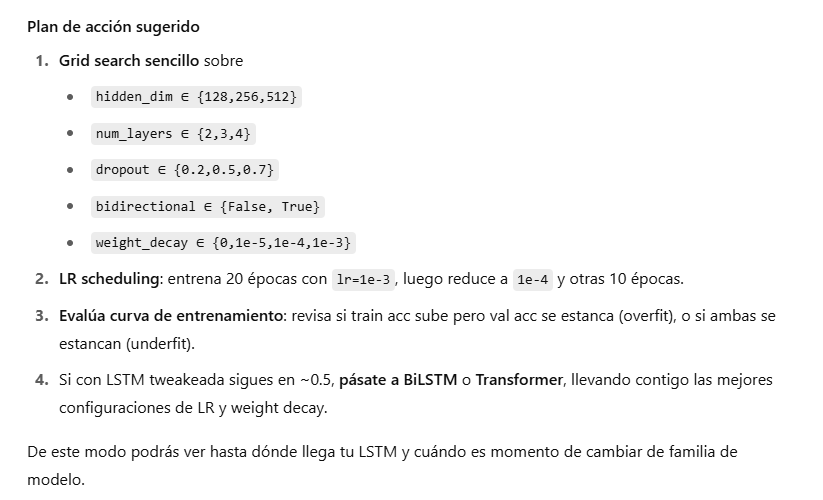



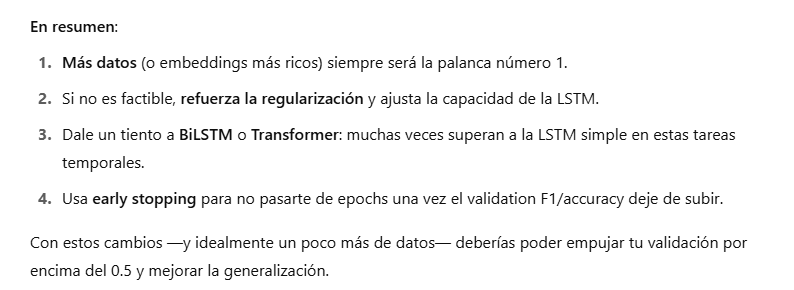

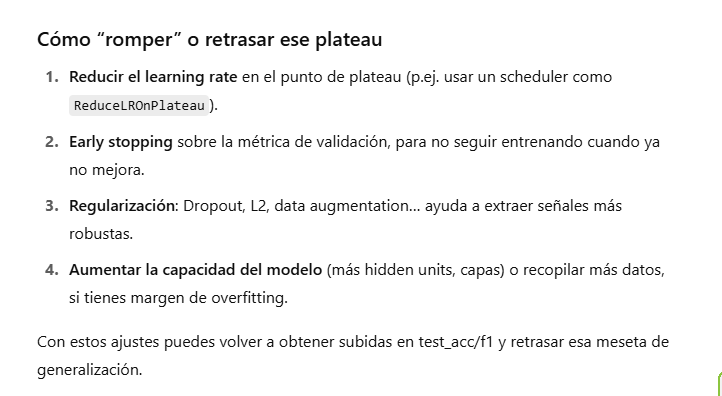

-------------------------------------------------------------------------------
## Modelo BiLSTM


## Preparación de datos, split y bucle de entrenamiento: BiLSTM

## Entrenamiento

-------------------------------------------------------------------------------
## Modelo Transformer

In [ ]:

# 3) Transformer con atención temporal
class TransformerClassifier(nn.Module):
    def __init__(
        self,
        input_dim,
        model_dim=256,
        n_heads=4,
        num_layers=2,
        ff_dim=512,
        dropout=0.1
    ):
        """
        input_dim: dimensión D del embedding sin pooling (secuencia)
        model_dim: dimensión interna del transformer
        n_heads: número de cabezas de atención
        num_layers: número de capas Encoder
        ff_dim: dimensión del feed-forward
        dropout: dropout en capas Encoder
        """
        super().__init__()
        # Proyección de la dimensión de entrada al espacio model_dim
        self.token_proj = nn.Linear(input_dim, model_dim)
        # Capa TransformerEncoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=model_dim,
            nhead=n_heads,
            dim_feedforward=ff_dim,
            dropout=dropout,
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(
            encoder_layer,
            num_layers=num_layers
        )
        # Clasificador al token de posición 0 (CLS) o media de salidas
        self.classifier = nn.Linear(model_dim, 3)

    def forward(self, x, lengths=None):
        """
        x: FloatTensor (B, T, D)
        lengths: LongTensor (B,) opcional para masking
        """
        # x → proyección
        x = self.token_proj(x)  # (B, T, model_dim)

        # Generar máscara de padding si lengths dado
        if lengths is not None:
            max_len = x.size(1)
            mask = torch.arange(max_len, device=lengths.device) \
                   .unsqueeze(0) >= lengths.unsqueeze(1)
        else:
            mask = None

        # TransformerEncoder
        out = self.transformer(x, src_key_padding_mask=mask)  # (B, T, model_dim)

        # Agregado temporal: tomamos token 0 como representativo
        cls_token = out[:, 0, :]  # (B, model_dim)
        return self.classifier(cls_token)



## Preparación de datos, split y bucle de entrenamiento: Transformer
Con atención atemporal


In [ ]:
# Chunk 2: Collate function y preparación de datos para Transformer

import numpy as np
import torch
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.model_selection import train_test_split
from torch.nn.utils.rnn import pad_sequence

def collate_sequences(batch):
    """
    Recibe una lista de tuplas (tensor_seq, label).
    Devuelve:
      - padded: FloatTensor (B, T_max, D)
      - lengths: LongTensor (B,)
      - labels: LongTensor (B,)
    """
    seqs, labels = zip(*batch)
    lengths = torch.tensor([s.size(0) for s in seqs], dtype=torch.long)
    padded  = pad_sequence(seqs, batch_first=True)
    labels  = torch.tensor(labels, dtype=torch.long)
    return padded, lengths, labels

def prepare_transformer_data(df, norm='minmax', test_size=0.2):
    """
    Construye listas de muestras para train y test:
      - norm: 'minmax' o 'l2'
    Cada muestra es (tensor_seq, label).
    """
    feat_cols = [c for c in df.columns if c.startswith('feat_')]
    seqs, labs = [], []
    for vid, grp in df.groupby('video_ID'):
        arr = grp[feat_cols].values.astype(np.float32)  # (T, D)
        seqs.append(arr)
        labs.append(int(grp['shoot_zone'].iloc[0]))
    # Normalización
    if norm == 'minmax':
        all_frames = np.vstack(seqs)  # (sum_T, D)
        scaler = MinMaxScaler().fit(all_frames)
        seqs = [scaler.transform(s) for s in seqs]
    else:  # 'l2'
        seqs = [s / np.linalg.norm(s, axis=1, keepdims=True) for s in seqs]
    # Split estratificado
    idx = list(range(len(seqs)))
    idx_tr, idx_te = train_test_split(idx,
                                      test_size=test_size,
                                      stratify=labs,
                                      random_state=42)
    # Convertir a lista de tuplas (tensor_seq, label)
    train_list = [(torch.from_numpy(seqs[i]), labs[i]) for i in idx_tr]
    test_list  = [(torch.from_numpy(seqs[i]), labs[i]) for i in idx_te]
    return train_list, test_list


def run_training_transformer(model, train_loader, test_loader, epochs=20, lr=1e-3):
    """
    Función de entrenamiento específica para el modelo Transformer
    Args:
        model: Instancia de TransformerClassifier
        train_loader: DataLoader con datos de entrenamiento 
        test_loader: DataLoader con datos de test
        epochs: Número de épocas de entrenamiento
        lr: Learning rate para el optimizador
    Returns:
        history: Diccionario con métricas de entrenamiento
    """
    device = next(model.parameters()).device
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()
    history = {'train_loss': [], 'test_acc': [], 'test_f1': []}

    for ep in range(1, epochs + 1):
        # --- Fase de entrenamiento ---
        model.train()
        total_loss = 0
        for xb, lengths, yb in train_loader:
            xb = xb.to(device)
            lengths = lengths.to(device)
            yb = yb.to(device)
            
            optimizer.zero_grad()
            out = model(xb, lengths)
            loss = loss_fn(out, yb)
            
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item() * yb.size(0)
        
        avg_loss = total_loss / len(train_loader.dataset)
        history['train_loss'].append(avg_loss)

        # --- Fase de evaluación ---
        model.eval()
        all_preds, all_labels = [], []
        
        with torch.no_grad():
            for xb, lengths, yb in test_loader:
                xb = xb.to(device)
                lengths = lengths.to(device)
                outputs = model(xb, lengths)
                preds = outputs.argmax(dim=1).cpu().numpy()
                all_preds.append(preds)
                all_labels.append(yb.numpy())

        all_preds = np.concatenate(all_preds)
        all_labels = np.concatenate(all_labels)
        
        acc = accuracy_score(all_labels, all_preds)
        f1 = f1_score(all_labels, all_preds, average='macro')
        
        history['test_acc'].append(acc)
        history['test_f1'].append(f1)

        print(f"Época {ep:02d}/{epochs} | "
                f"loss {avg_loss:.4f} | "
                f"acc {acc:.4f} | "
                f"f1_macro {f1:.4f}")

    return history


## Entrenamiento

In [ ]:
import os
import pandas as pd
from torch.utils.data import DataLoader

# Configuración

DATA_DIR = "Gait_Embeddings_good"
NORMS = ['minmax', 'l2']
EPOCHS = 100  # Aumentado para mejor convergencia
BATCH_SIZE = 32  # Tamaño de batch para entrenamiento
LR = 1e-3
MODEL_DIM = 256  # Dimensión del transformer
N_HEADS = 8  # Número de cabezas de atención
N_LAYERS = 2  # Capas del encoder

results_transformer = []

for fname in os.listdir(DATA_DIR):
    if not fname.endswith('.csv'):
        continue
        
    print(f"\n--- Entrenando Transformer con {fname} ---")
    df = pd.read_csv(os.path.join(DATA_DIR, fname))
    
    for norm in NORMS:
        # Preparar datos
        train_list, test_list = prepare_transformer_data(df, norm=norm)
        tr_loader = DataLoader(train_list, 
                             batch_size=BATCH_SIZE, 
                             shuffle=True, 
                             collate_fn=collate_sequences)
        te_loader = DataLoader(test_list, 
                             batch_size=BATCH_SIZE,
                             collate_fn=collate_sequences)

        # Crear y entrenar modelo
        model = TransformerClassifier(
            input_dim=df.filter(like='feat_').shape[1],
            model_dim=MODEL_DIM,
            n_heads=N_HEADS,
            num_layers=N_LAYERS,
            ff_dim=MODEL_DIM * 4,  # Típicamente 4x model_dim
            dropout=0.1
        ).to(DEVICE)
        
        history = run_training_transformer(
            model, 
            tr_loader, 
            te_loader,
            epochs=EPOCHS, 
            lr=LR
        )

        # Guardar resultados
        results_transformer.append({
            'extractor': fname,
            'model': 'Transformer',
            'normalization': norm,
            'accuracy': history['test_acc'][-1],
            'f1_macro': history['test_f1'][-1]
        })

# Guardar resultados
df_results = pd.DataFrame(results_transformer)
df_results.to_csv('transformer_results.csv', index=False)
print("\n✅ Resultados Transformer guardados en transformer_results.csv")

## Modelo TCN

## Entrenamiento


## Métricas posibles a usar
Precisión global (Accuracy)

F₁‐score macro
Matriz de confusión

Precisión (Precision) por clase

Exhaustividad (Recall) por clase

Balanced accuracy (accuracy balanceada)

Matthew’s Correlation Coefficient (MCC)

Curva ROC y AUC multiclass (one-vs-rest)

Log-Loss (Cross-Entropy Loss)

Brier Score

Cohen’s Kappa

Top-k accuracy (por ejemplo Top-2)

Time-to-decision (número medio de frames o ms antes del golpeo en que la predicción es estable)

Área bajo la curva Accuracy vs. Earliness

Tiempo de inferencia por muestra (latencia)

Número de parámetros / FLOPS / uso de memoria


## Preparación de los datos

Cuando tienes una secuencia de embeddings de forma (T,D) —es decir, 
T instantes en el tiempo y D características en cada uno— el pooling temporal la transforma en un único vector de dimensión D. Para cada característica j (j=1,…,D) se calcula bien la media de sus T valores (mean pooling) o 4bien su máximo (max pooling) a lo largo de toda la secuencia. De este modo, cada componente del vector resultante sintetiza la evolución completa de esa característica en el intervalo temporal.

Para el MLP, la función prepare_mlp_data agrupa cada secuencia (T,D) y aplica pooling (media o máximo) para convertirla en un vector plano de dimensión (D,), que luego normaliza y envía al modelo como input (batch, D). Por otro lado, SequenceDataset junto a collate_sequences conservan la secuencia completa de embeddings (T, D), la rellenan con ceros hasta T_max y devuelven también un tensor de longitudes reales, de modo que tu LSTM y Transformer reciben entradas de forma (batch, T_max, D) y usan esas longitudes para ignorar el padding durante el entrenamiento.

In [ ]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ------------------------------------------------
# 3) Dataset y Collate para secuencias
# ------------------------------------------------
class SequenceDataset(Dataset):
    def __init__(self, df):
        feature_cols = [c for c in df.columns if c.startswith('feat_')]
        self.samples = []
        for vid, grp in df.groupby('video_ID'):
            arr = torch.from_numpy(grp[feature_cols].values).float()  # (T,D)
            label = int(grp['shoot_zone'].iloc[0])
            self.samples.append((arr, label))
    def __len__(self): return len(self.samples)
    def __getitem__(self, idx): return self.samples[idx]

def collate_sequences(batch):
    seqs, labels = zip(*batch)
    lengths = torch.tensor([s.size(0) for s in seqs], dtype=torch.long)
    padded = pad_sequence(seqs, batch_first=True)  # (B, T_max, D)
    labels = torch.tensor(labels, dtype=torch.long)
    return padded, lengths, labels

# ------------------------------------------------
# 4) Funciones de preparación de datos
# ------------------------------------------------
def prepare_mlp_data(df, pooling='mean', test_size=0.2):
    # Extrae vectores (T,D) → pooling → (D,) y etiquetas
    feature_cols = [c for c in df.columns if c.startswith('feat_')]
    seqs, labs = [], []
    for vid, grp in df.groupby('video_ID'):
        arr = grp[feature_cols].values  # (T,D)
        vec = arr.mean(axis=0) if pooling=='mean' else arr.max(axis=0)
        seqs.append(vec)
        labs.append(int(grp['shoot_zone'].iloc[0]))
    X = np.stack(seqs).astype(np.float32)
    y = np.array(labs, dtype=np.int64)
    # Normalizamos MinMax
    X = MinMaxScaler().fit_transform(X)
    # Split
    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=test_size,
                                          stratify=y, random_state=42)
    tr_ds = TensorDataset(torch.from_numpy(Xtr), torch.from_numpy(ytr))
    te_ds = TensorDataset(torch.from_numpy(Xte), torch.from_numpy(yte))
    return tr_ds, te_ds

def prepare_seq_data(df, test_size=0.2):
    # Dataset completo
    full = SequenceDataset(df)
    labels = [full[i][1] for i in range(len(full))]
    idx_tr, idx_te = train_test_split(list(range(len(full))),
                                      test_size=test_size,
                                      stratify=labels,
                                      random_state=42)
    tr_ds = torch.utils.data.Subset(full, idx_tr)
    te_ds = torch.utils.data.Subset(full, idx_te)
    return tr_ds, te_ds

# ------------------------------------------------
# 5) Bucle de entrenamiento + evaluación
# ------------------------------------------------
def run_training(model, train_loader, test_loader, epochs=20, lr=1e-3):
    optim = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()
    history = {'train_loss':[], 'test_acc':[], 'test_f1':[]}

    for ep in range(1, epochs+1):
        # --- entrenamiento
        model.train()
        total_loss = 0
        for batch in train_loader:
            optim.zero_grad()
            if isinstance(model, MLPClassifier):
                xb, yb = batch
                xb, yb = xb.to(DEVICE), yb.to(DEVICE)
                out = model(xb)
            else:
                xb, lengths, yb = batch
                xb, yb = xb.to(DEVICE), yb.to(DEVICE)
                lengths = lengths.to(DEVICE)
                out = model(xb, lengths)
            loss = loss_fn(out, yb)
            loss.backward()
            optim.step()
            total_loss += loss.item() * yb.size(0)
        history['train_loss'].append(total_loss / len(train_loader.dataset))

        # --- evaluación
        model.eval()
        all_preds, all_labels = [], []
        with torch.no_grad():
            for batch in test_loader:
                if isinstance(model, MLPClassifier):
                    xb, yb = batch
                    xb = xb.to(DEVICE)
                    preds = model(xb).argmax(dim=1).cpu().numpy()
                else:
                    xb, lengths, yb = batch
                    xb = xb.to(DEVICE); lengths = lengths.to(DEVICE)
                    preds = model(xb, lengths).argmax(dim=1).cpu().numpy()
                all_preds.append(preds)
                all_labels.append(yb.numpy())
        all_preds = np.concatenate(all_preds)
        all_labels = np.concatenate(all_labels)
        acc = accuracy_score(all_labels, all_preds)
        f1 = f1_score(all_labels, all_preds, average='macro')
        history['test_acc'].append(acc)
        history['test_f1'].append(f1)

        print(f"Ep{ep:02d} | loss {history['train_loss'][-1]:.4f} | "
              f"acc {acc:.4f} | f1_macro {f1:.4f}")

    return history

## Entrenamiento

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score

data_dir = "Gait_Embeddings_good/"
extractors = [fname for fname in os.listdir(data_dir)]
pools      = ['mean', 'max']
norms      = ['minmax', 'l2']
classifiers = {
    'MLP':    MLPClassifier,
    #'LSTM':   LSTMClassifier,
    #'Transf': TransformerClassifier,
}

results = []

for csv_file in extractors:
    df = pd.read_csv(f'Gait_Embeddings_good/{csv_file}')
        
    # ————————————————————————
    # 1) MLP (usa pooling + norm)
    # ————————————————————————
    for pool in pools:
        for norm in norms:
            tr_ds, te_ds = prepare_mlp_data(df, pooling=pool)
            # crea loaders
            tr_loader = DataLoader(tr_ds, batch_size=32, shuffle=True)
            te_loader = DataLoader(te_ds, batch_size=32)

            model = MLPClassifier(input_dim=tr_ds[0][0].shape[0]).to(DEVICE)
            history = run_training(model, tr_loader, te_loader, epochs=20, lr=1e-3)

            # extraer métricas finales
            final_acc = history['test_acc'][-1]
            final_f1  = history['test_f1'][-1]

            results.append({
                'extractor':    csv_file,
                'model':        'MLP',
                'pooling':      pool,
                'normalization':norm,
                'accuracy':     final_acc,
                'f1_macro':     final_f1
            })
"""
    # ————————————————————————
    # 2) LSTM y Transformer (sin pooling/norm)
    # ————————————————————————
    tr_seq, te_seq = prepare_seq_data(df)
    for name, Cls in [('LSTM', LSTMClassifier), ('Transf', TransformerClassifier)]:
        tr_loader = DataLoader(tr_seq, batch_size=16, shuffle=True, collate_fn=collate_sequences)
        te_loader = DataLoader(te_seq, batch_size=16, collate_fn=collate_sequences)

        model = Cls(input_dim=df.filter(like='feat_').shape[1]).to(DEVICE)
        history = run_training(model, tr_loader, te_loader, epochs=20, lr=1e-3)

        final_acc = history['test_acc'][-1]
        final_f1  = history['test_f1'][-1]

        results.append({
            'extractor':     csv_file,
            'model':         name,
            'pooling':       None,
            'normalization': None,
            'accuracy':      final_acc,
            'f1_macro':      final_f1
        })
"""
# ————————————————————————
# Volcar a CSV
# ————————————————————————
df_res = pd.DataFrame(results)
df_res.to_csv('resultados_penaltis.csv', index=False)
print("✅ Resultados guardados en resultados_penaltis.csv")
print(df_res)


# Guadar el modelo final
#torch.save(model.state_dict(), 'model_final.pth')
